# Spike Plotting

Brief 1-2 sentence description of notebook.

In [1]:
import glob
import re
import os

In [2]:
# Imports of all used packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage.filters import gaussian_filter1d


/tmp/ipykernel_2684291/64613958.py:6: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


## Inputs & Data

Explanation of each input and where it comes from.

In [3]:
# Inputs and Required data loading
# input varaible names are in all caps snake case
# Whenever an input changes or is used for processing 
# the vairables are all lower in snake case

TRIAL_LENGTH = 10
SAMPLING_RATE = 20000
TONE_TIMESTAMP_DF = pd.read_excel("../../data/rce_tone_timestamp.xlsx", index_col=0)
OUTPUT_DIR = r"./proc" # where data is saved should always be shown in the inputs

INPUT_DIR=glob.glob("/scratch/back_up/reward_competition_extention/proc/phy_curation/*")

In [4]:
TRIAL_NUMBER_COL = "trial_number"

## Outputs

Describe each output that the notebook creates. 

- Is it a plot or is it data?

- How valuable is the output and why is it valuable or useful?

## Processing

Describe what is done to the data here and how inputs are manipulated to generate outputs. 

In [5]:
# As much code and as many cells as required
# includes EDA and playing with data
# GO HAM!

# Ideally functions are defined here first and then data is processed using the functions

# function names are short and in snake case all lowercase
# a function name should be unique but does not have to describe the function
# doc strings describe functions not function names


In [6]:
def find_closest(target, reference_list):
    """
    Finds the closest number in a reference list to the given target number.

    Parameters:
    - target (float or int): The number for which we want to find the closest value.
    - reference_list (list of float or int): The list of numbers in which we want to search.

    Returns:
    - float or int: The closest number from the reference list to the target.
    """

    # Using the 'min' function with a custom key to determine the closest value by minimal absolute difference
    closest_value = min(reference_list, key=lambda x: abs(x - target))
    
    return closest_value

In [7]:
def find_index_in_group(group, value_column, new_column_name):
    unique_values = sorted(list(set(group[value_column])))
    group[new_column_name] = group[value_column].apply(lambda x: unique_values.index(x) + 1)
    return group

### Getting the subject IDs from the file name

- Dropping all unlabeled trials

In [8]:
all_trials_df = TONE_TIMESTAMP_DF.dropna(subset="condition").sort_values(by=["recording_file", "time_stamp_index"]).reset_index(drop=True)

- Making sure that all timestamps are integers

In [9]:
all_trials_df["time_stamp_index"] = all_trials_df["time_stamp_index"].astype(int)
all_trials_df["time_stamp_index"] = all_trials_df["time_stamp_index"].astype(int)
all_trials_df["video_frame"] = all_trials_df["video_frame"].astype(int)

In [10]:
all_trials_df.head()

,time,state,recording_dir,recording_file,din,time_stamp_index,video_file,video_frame,video_number,subject_info,condition,competition_closeness,Unnamed: 13
0,6310663.0,1.0,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,dio_ECU_Din1,1390826,20221202_134600_omission_and_competition_subje...,1734,1.0,6_1_top_2_base_3,rewarded,NaN,NaN
1,7910662.0,1.0,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,dio_ECU_Din1,2990825,20221202_134600_omission_and_competition_subje...,3728,1.0,6_1_top_2_base_3,rewarded,NaN,NaN
2,9710660.0,1.0,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,dio_ECU_Din1,4790823,20221202_134600_omission_and_competition_subje...,5972,1.0,6_1_top_2_base_3,rewarded,NaN,NaN
3,11310658.0,1.0,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,dio_ECU_Din1,6390821,20221202_134600_omission_and_competition_subje...,7966,1.0,6_1_top_2_base_3,omission,NaN,NaN
4,12810657.0,1.0,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,dio_ECU_Din1,7890820,20221202_134600_omission_and_competition_subje...,9836,1.0,6_1_top_2_base_3,rewarded,NaN,NaN


In [11]:
all_trials_df.tail()

,time,state,recording_dir,recording_file,din,time_stamp_index,video_file,video_frame,video_number,subject_info,condition,competition_closeness,Unnamed: 13
738,68781880.0,1.0,20230621_111240_standard_comp_to_omission_D5_s...,20230621_111240_standard_comp_to_omission_D5_s...,dio_ECU_Din1,65588836,20230621_111240_standard_comp_to_omission_D5_s...,65465,2.0,1-4_t3b3L_box1,rewarded,NaN,rewarded
739,70681909.0,1.0,20230621_111240_standard_comp_to_omission_D5_s...,20230621_111240_standard_comp_to_omission_D5_s...,dio_ECU_Din1,67488865,20230621_111240_standard_comp_to_omission_D5_s...,67447,1.0,1-4_t3b3L_box1,omission,NaN,omission
740,70681909.0,1.0,20230621_111240_standard_comp_to_omission_D5_s...,20230621_111240_standard_comp_to_omission_D5_s...,dio_ECU_Din1,67488865,20230621_111240_standard_comp_to_omission_D5_s...,67362,2.0,1-4_t3b3L_box1,omission,NaN,omission
741,71681918.0,1.0,20230621_111240_standard_comp_to_omission_D5_s...,20230621_111240_standard_comp_to_omission_D5_s...,dio_ECU_Din1,68488874,20230621_111240_standard_comp_to_omission_D5_s...,68444,1.0,1-4_t3b3L_box1,rewarded,NaN,rewarded
742,71681918.0,1.0,20230621_111240_standard_comp_to_omission_D5_s...,20230621_111240_standard_comp_to_omission_D5_s...,dio_ECU_Din1,68488874,20230621_111240_standard_comp_to_omission_D5_s...,68359,2.0,1-4_t3b3L_box1,rewarded,NaN,rewarded


In [12]:
1390826/20000

69.5413

In [13]:
68488874/20000

3424.4437

- Original timestamps are based on ephys recordings at 20kHz. The LFP will be at 1kHz, so we will need to divide all the timestamps by 20

In [14]:
all_trials_df["resampled_index"] = all_trials_df["time_stamp_index"] // 20

In [15]:
all_trials_df["recording_dir"].unique()

array(['20221202_134600_omission_and_competition_subject_6_1_and_6_2',
       '20221203_154800_omission_and_competition_subject_6_4_and_6_1',
       '20221214_125409_om_and_comp_6_1_and_6_3',
       '20221215_145401_comp_amd_om_6_1_and_6_3',
       '20230612_101430_standard_comp_to_training_D1_subj_1-4_and_1-3',
       '20230617_115521_standard_comp_to_omission_D1_subj_1-1_and_1-2',
       '20230618_100636_standard_comp_to_omission_D2_subj_1-4_and_1-1',
       '20230619_115321_standard_comp_to_omission_D3_subj_1-2_and_1-4',
       '20230620_114347_standard_comp_to_omission_D4_subj_1-2_and_1-1',
       '20230621_111240_standard_comp_to_omission_D5_subj_1-4_and_1-2'],
      dtype=object)

- Getting a list of all the subjects through the recording name

In [16]:
all_trials_df["all_subjects"] = all_trials_df["recording_dir"].apply(lambda x: ["{}.{}".format(tup[0],tup[1]) for tup in re.findall(r'(\d+)-(\d+)', x.replace("_", "-"))[1:]])

In [17]:
all_trials_df["all_subjects"].head()

0    [6.1, 6.2]
1    [6.1, 6.2]
2    [6.1, 6.2]
3    [6.1, 6.2]
4    [6.1, 6.2]
Name: all_subjects, dtype: object

- Getting the current subject of the recording through the ending of the recording name file

In [18]:
all_trials_df["subject_info"].head()

0    6_1_top_2_base_3
1    6_1_top_2_base_3
2    6_1_top_2_base_3
3    6_1_top_2_base_3
4    6_1_top_2_base_3
Name: subject_info, dtype: object

In [19]:
all_trials_df["current_subject"] = all_trials_df["subject_info"].apply(lambda x: ".".join(x.replace("-","_").split("_")[:2]))

In [20]:
all_trials_df.head()

,time,state,recording_dir,recording_file,din,time_stamp_index,video_file,video_frame,video_number,subject_info,condition,competition_closeness,Unnamed: 13,resampled_index,all_subjects,current_subject
0,6310663.0,1.0,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,dio_ECU_Din1,1390826,20221202_134600_omission_and_competition_subje...,1734,1.0,6_1_top_2_base_3,rewarded,NaN,NaN,69541,"[6.1, 6.2]",6.1
1,7910662.0,1.0,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,dio_ECU_Din1,2990825,20221202_134600_omission_and_competition_subje...,3728,1.0,6_1_top_2_base_3,rewarded,NaN,NaN,149541,"[6.1, 6.2]",6.1
2,9710660.0,1.0,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,dio_ECU_Din1,4790823,20221202_134600_omission_and_competition_subje...,5972,1.0,6_1_top_2_base_3,rewarded,NaN,NaN,239541,"[6.1, 6.2]",6.1
3,11310658.0,1.0,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,dio_ECU_Din1,6390821,20221202_134600_omission_and_competition_subje...,7966,1.0,6_1_top_2_base_3,omission,NaN,NaN,319541,"[6.1, 6.2]",6.1
4,12810657.0,1.0,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,dio_ECU_Din1,7890820,20221202_134600_omission_and_competition_subje...,9836,1.0,6_1_top_2_base_3,rewarded,NaN,NaN,394541,"[6.1, 6.2]",6.1


- Labeling the trial as a winner or loser if the winner matches the subject id or not

In [21]:
all_trials_df["trial_outcome"] = all_trials_df.apply(
    lambda x: "win" if str(x["condition"]).strip() == str(x["current_subject"]) 
             else ("lose" if str(x["condition"]) in x["all_subjects"] 
                   else x["condition"]), axis=1)

In [22]:
all_trials_df.head()

,time,state,recording_dir,recording_file,din,time_stamp_index,video_file,video_frame,video_number,subject_info,condition,competition_closeness,Unnamed: 13,resampled_index,all_subjects,current_subject,trial_outcome
0,6310663.0,1.0,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,dio_ECU_Din1,1390826,20221202_134600_omission_and_competition_subje...,1734,1.0,6_1_top_2_base_3,rewarded,NaN,NaN,69541,"[6.1, 6.2]",6.1,rewarded
1,7910662.0,1.0,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,dio_ECU_Din1,2990825,20221202_134600_omission_and_competition_subje...,3728,1.0,6_1_top_2_base_3,rewarded,NaN,NaN,149541,"[6.1, 6.2]",6.1,rewarded
2,9710660.0,1.0,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,dio_ECU_Din1,4790823,20221202_134600_omission_and_competition_subje...,5972,1.0,6_1_top_2_base_3,rewarded,NaN,NaN,239541,"[6.1, 6.2]",6.1,rewarded
3,11310658.0,1.0,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,dio_ECU_Din1,6390821,20221202_134600_omission_and_competition_subje...,7966,1.0,6_1_top_2_base_3,omission,NaN,NaN,319541,"[6.1, 6.2]",6.1,omission
4,12810657.0,1.0,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,dio_ECU_Din1,7890820,20221202_134600_omission_and_competition_subje...,9836,1.0,6_1_top_2_base_3,rewarded,NaN,NaN,394541,"[6.1, 6.2]",6.1,rewarded


In [23]:
all_trials_df

,time,state,recording_dir,recording_file,din,time_stamp_index,video_file,video_frame,video_number,subject_info,condition,competition_closeness,Unnamed: 13,resampled_index,all_subjects,current_subject,trial_outcome
0,6310663.0,1.0,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,dio_ECU_Din1,1390826,20221202_134600_omission_and_competition_subje...,1734,1.0,6_1_top_2_base_3,rewarded,NaN,NaN,69541,"[6.1, 6.2]",6.1,rewarded
1,7910662.0,1.0,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,dio_ECU_Din1,2990825,20221202_134600_omission_and_competition_subje...,3728,1.0,6_1_top_2_base_3,rewarded,NaN,NaN,149541,"[6.1, 6.2]",6.1,rewarded
2,9710660.0,1.0,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,dio_ECU_Din1,4790823,20221202_134600_omission_and_competition_subje...,5972,1.0,6_1_top_2_base_3,rewarded,NaN,NaN,239541,"[6.1, 6.2]",6.1,rewarded
3,11310658.0,1.0,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,dio_ECU_Din1,6390821,20221202_134600_omission_and_competition_subje...,7966,1.0,6_1_top_2_base_3,omission,NaN,NaN,319541,"[6.1, 6.2]",6.1,omission
4,12810657.0,1.0,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,dio_ECU_Din1,7890820,20221202_134600_omission_and_competition_subje...,9836,1.0,6_1_top_2_base_3,rewarded,NaN,NaN,394541,"[6.1, 6.2]",6.1,rewarded
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,68781880.0,1.0,20230621_111240_standard_comp_to_omission_D5_s...,20230621_111240_standard_comp_to_omission_D5_s...,dio_ECU_Din1,65588836,20230621_111240_standard_comp_to_omission_D5_s...,65465,2.0,1-4_t3b3L_box1,rewarded,NaN,rewarded,3279441,"[1.4, 1.2]",1.4,rewarded
739,70681909.0,1.0,20230621_111240_standard_comp_to_omission_D5_s...,20230621_111240_standard_comp_to_omission_D5_s...,dio_ECU_Din1,67488865,20230621_111240_standard_comp_to_omission_D5_s...,67447,1.0,1-4_t3b3L_box1,omission,NaN,omission,3374443,"[1.4, 1.2]",1.4,omission
740,70681909.0,1.0,20230621_111240_standard_comp_to_omission_D5_s...,20230621_111240_standard_comp_to_omission_D5_s...,dio_ECU_Din1,67488865,20230621_111240_standard_comp_to_omission_D5_s...,67362,2.0,1-4_t3b3L_box1,omission,NaN,omission,3374443,"[1.4, 1.2]",1.4,omission
741,71681918.0,1.0,20230621_111240_standard_comp_to_omission_D5_s...,20230621_111240_standard_comp_to_omission_D5_s...,dio_ECU_Din1,68488874,20230621_111240_standard_comp_to_omission_D5_s...,68444,1.0,1-4_t3b3L_box1,rewarded,NaN,rewarded,3424443,"[1.4, 1.2]",1.4,rewarded


In [24]:
all_trials_df["competition_closeness"] = all_trials_df["competition_closeness"].fillna("")

In [25]:
all_trials_df["competition_closeness"].unique()

array(['', 'Subj 1 Only', 'Subj 2 blocking Subj 1', 'Subj 1 then Subj 2',
       'Subj 1 blocking Subj 2', 'Subj 2 Only', 'Subj 2 then Subj 1',
       'Close Call'], dtype=object)

In [26]:
all_trials_df = all_trials_df[~all_trials_df["competition_closeness"].str.contains("Only")]

# Reading in Phy

- Reading in a spreadsheet of all the unit classifications
    - They are divided up into good units, multi-units, and noise

In [27]:
INPUT_DIR

['/scratch/back_up/reward_competition_extention/proc/phy_curation/20230618_100636_standard_comp_to_omission_D2_subj_1_4_t4b3L_box1_merged.rec',
 '/scratch/back_up/reward_competition_extention/proc/phy_curation/20221202_134600_omission_and_competition_subject_6_1_top_2_base_3_merged.rec',
 '/scratch/back_up/reward_competition_extention/proc/phy_curation/20230618_100636_standard_comp_to_omission_D2_subj_1_1_t1b2L_box2_merged.rec',
 '/scratch/back_up/reward_competition_extention/proc/phy_curation/tbc',
 '/scratch/back_up/reward_competition_extention/proc/phy_curation/20221203_154800_omission_and_competition_subject_6_1_top_1_base_3_merged.rec',
 '/scratch/back_up/reward_competition_extention/proc/phy_curation/20230621_111240_standard_comp_to_omission_D5_subj_1-4_t3b3L_box1_merged.rec',
 '/scratch/back_up/reward_competition_extention/proc/phy_curation/20230620_114347_standard_comp_to_omission_D4_subj_1-1_t1b2L_box_2_merged.rec',
 '/scratch/back_up/reward_competition_extention/proc/phy_cura

In [28]:
recording_to_cluster_info = {}
for recording_dir in INPUT_DIR:
    try:
        recording_basename = os.path.basename(recording_dir).strip(".rec")
        file_path = os.path.join(recording_dir, "phy", "cluster_info.tsv")
        recording_to_cluster_info[recording_basename] = pd.read_csv(file_path, sep="\t")
    except Exception as e:
        print(e)

[Errno 2] No such file or directory: '/scratch/back_up/reward_competition_extention/proc/phy_curation/tbc/phy/cluster_info.tsv'


In [29]:
recording_to_cluster_info[list(recording_to_cluster_info.keys())[1]]

,cluster_id,1_5_ms_isi,1ms_isi,2ms_isi,amp,ch,channel_group,depth,fr,group,n_spikes,sh,si_unit_id
0,0,34,12,114,9.905600,0,0,0.0,5.331166,mua,17857,0,1
1,1,254,93,613,9.664331,2,0,40.0,18.101842,mua,60633,0,2
2,2,5,1,11,7.940112,3,0,60.0,2.168949,mua,7265,0,3
3,3,4,3,8,18.886822,3,0,60.0,0.415280,noise,1391,0,4
4,4,158,49,496,8.658522,5,0,100.0,12.934877,mua,43326,0,5
5,7,483,162,1182,9.899465,9,0,180.0,21.764426,mua,72901,0,8
6,8,297,189,492,4.622509,12,0,240.0,0.756520,noise,2534,0,9
7,9,36,4,144,9.896030,13,0,260.0,0.975654,mua,3268,0,10
8,10,425,166,885,11.562847,14,0,280.0,2.755894,mua,9231,0,11
9,13,23,4,93,7.631701,22,0,440.0,5.425209,good,18172,0,15


- Combining all the unit info dataframes and adding the recording name

In [30]:
recording_to_cluster_info_df = pd.concat(recording_to_cluster_info, names=['recording_name']).reset_index(level=1, drop=True).reset_index()


In [31]:
recording_to_cluster_info_df.head()

,recording_name,cluster_id,1_5_ms_isi,1ms_isi,2ms_isi,amp,ch,channel_group,depth,fr,group,n_spikes,sh,si_unit_id
0,20230618_100636_standard_comp_to_omission_D2_s...,8,0,0,1,9.198713,3,0.0,60.0,0.217516,mua,746,0,9.0
1,20230618_100636_standard_comp_to_omission_D2_s...,9,1,1,2,12.508228,3,0.0,60.0,1.605419,good,5506,0,10.0
2,20230618_100636_standard_comp_to_omission_D2_s...,19,1,0,2,13.435120,15,0.0,300.0,0.503261,good,1726,0,20.0
3,20230618_100636_standard_comp_to_omission_D2_s...,20,0,0,0,7.342390,20,0.0,400.0,0.219265,mua,752,0,22.0
4,20230618_100636_standard_comp_to_omission_D2_s...,21,47,10,122,10.664793,21,0.0,420.0,0.605604,noise,2077,0,23.0


- Filtering for the good units

In [32]:
good_unit_cluster_info_df = recording_to_cluster_info_df[recording_to_cluster_info_df["group"] == "good"].reset_index(drop=True)

In [33]:
good_unit_cluster_info_df.head()

,recording_name,cluster_id,1_5_ms_isi,1ms_isi,2ms_isi,amp,ch,channel_group,depth,fr,group,n_spikes,sh,si_unit_id
0,20230618_100636_standard_comp_to_omission_D2_s...,9,1,1,2,12.508228,3,0.0,60.0,1.605419,good,5506,0,10.0
1,20230618_100636_standard_comp_to_omission_D2_s...,19,1,0,2,13.435120,15,0.0,300.0,0.503261,good,1726,0,20.0
2,20230618_100636_standard_comp_to_omission_D2_s...,65,2,1,3,8.466800,2,0.0,40.0,2.628268,good,9014,0,8.0
3,20230618_100636_standard_comp_to_omission_D2_s...,83,9,3,26,13.022879,2,0.0,40.0,10.683353,good,36640,0,5.0
4,20230618_100636_standard_comp_to_omission_D2_s...,87,3,0,4,15.160955,0,0.0,0.0,2.416584,good,8288,0,1.0


In [34]:
recording_to_good_unit_ids = good_unit_cluster_info_df.groupby('recording_name')['cluster_id'].apply(list).to_dict()


- A list of all the unit IDs that each spike came from in order
    - First item is first spike, second item is second spike, etc.

In [35]:
recording_to_spike_clusters = {}
for recording_dir in INPUT_DIR:
    try:
        recording_basename = os.path.basename(recording_dir).strip(".rec")
        file_path = os.path.join(recording_dir, "phy", "spike_clusters.npy")
        recording_to_spike_clusters[recording_basename] = np.load(file_path)
    except Exception as e:
        print(e)

[Errno 2] No such file or directory: '/scratch/back_up/reward_competition_extention/proc/phy_curation/tbc/phy/spike_clusters.npy'


In [36]:
recording_to_spike_clusters[list(recording_to_spike_clusters.keys())[0]]

array([82, 82, 82, ..., 87, 83, 99], dtype=int32)

In [37]:
recording_to_spike_clusters[list(recording_to_spike_clusters.keys())[0]].shape

(251953,)

- The times that all the spikes happened

In [38]:
recording_to_spike_times = {}
for recording_dir in INPUT_DIR:
    try:
        recording_basename = os.path.basename(recording_dir).strip(".rec")
        file_path = os.path.join(recording_dir, "phy", "spike_times.npy")
        recording_to_spike_times[recording_basename] = np.load(file_path)
    except Exception as e:
        print(e)

[Errno 2] No such file or directory: '/scratch/back_up/reward_competition_extention/proc/phy_curation/tbc/phy/spike_times.npy'


In [39]:
recording_to_spike_times[list(recording_to_spike_times.keys())[0]]

array([[      46],
       [     266],
       [     437],
       ...,
       [67098020],
       [67098467],
       [67098849]])

In [40]:
recording_to_spike_times[list(recording_to_spike_times.keys())[0]].shape

(251953, 1)

### Combining everything into a dataframe

In [41]:
recording_to_spike_df = {}
for recording_dir in INPUT_DIR:
    try:
        recording_basename = os.path.basename(recording_dir).strip(".rec")
        cluster_info_path = os.path.join(recording_dir, "phy", "cluster_info.tsv")
        cluster_info_df = pd.read_csv(cluster_info_path, sep="\t")

        spike_clusters_path = os.path.join(recording_dir, "phy", "spike_clusters.npy")
        spike_clusters = np.load(spike_clusters_path)
        
        spike_times_path = os.path.join(recording_dir, "phy", "spike_times.npy")
        spike_times = np.load(spike_times_path)

        spike_df = pd.DataFrame({'spike_clusters': spike_clusters, 'spike_times': spike_times.T[0]})

        merged_df = spike_df.merge(cluster_info_df, left_on='spike_clusters', right_on='cluster_id', how="left")
        merged_df["recording_name"] = recording_basename

        merged_df["timestamp_isi"] = merged_df.groupby('spike_clusters')["spike_times"].diff()
        merged_df["current_isi"] = merged_df["timestamp_isi"] / SAMPLING_RATE
        
        if not merged_df.empty:
            recording_to_spike_df[recording_basename] = merged_df
       
    except Exception as e:
        print(e)

[Errno 2] No such file or directory: '/scratch/back_up/reward_competition_extention/proc/phy_curation/tbc/phy/cluster_info.tsv'


In [42]:
cluster_info_df.head()

,cluster_id,1_5_ms_isi,1ms_isi,2ms_isi,amp,ch,channel_group,depth,fr,group,n_spikes,sh,si_unit_id
0,11,1,0,5,8.923600,3,0,60.0,2.805744,good,5778,0,13
1,12,0,0,0,9.733616,3,0,60.0,2.012289,noise,4144,0,14
2,44,3,1,29,9.739503,17,0,340.0,13.732511,good,28280,0,46
3,45,38,12,88,9.464285,18,0,360.0,9.795340,mua,20172,0,47
4,46,32,5,125,10.028766,18,0,360.0,6.568588,mua,13527,0,48


In [43]:
spike_times

array([[     143],
       [     168],
       [     274],
       ...,
       [38957896],
       [38957942],
       [38957990]])

In [44]:
spike_clusters

array([252, 246, 279, ...,  62,  60,  62], dtype=int32)

- Combining the spike time df for all recordings

In [45]:
all_spike_time_df = pd.concat(recording_to_spike_df.values())

In [46]:
all_spike_time_df = all_spike_time_df[all_spike_time_df["group"] == "good"].reset_index(drop=True)

In [47]:
all_spike_time_df.head()

,spike_clusters,spike_times,cluster_id,1_5_ms_isi,1ms_isi,2ms_isi,amp,ch,channel_group,depth,fr,group,n_spikes,sh,si_unit_id,recording_name,timestamp_isi,current_isi
0,65,937,65,2,1,3,8.466800,2,0.0,40.0,2.628268,good,9014,0,8.0,20230618_100636_standard_comp_to_omission_D2_s...,NaN,NaN
1,123,998,123,1,1,1,19.984566,24,0.0,480.0,2.384219,good,8177,0,28.0,20230618_100636_standard_comp_to_omission_D2_s...,NaN,NaN
2,103,1125,103,12,2,32,14.402934,6,0.0,120.0,8.755451,good,30028,0,11.0,20230618_100636_standard_comp_to_omission_D2_s...,NaN,NaN
3,123,1327,123,1,1,1,19.984566,24,0.0,480.0,2.384219,good,8177,0,28.0,20230618_100636_standard_comp_to_omission_D2_s...,329.0,0.01645
4,103,1346,103,12,2,32,14.402934,6,0.0,120.0,8.755451,good,30028,0,11.0,20230618_100636_standard_comp_to_omission_D2_s...,221.0,0.01105


In [48]:
all_spike_time_df.tail()

,spike_clusters,spike_times,cluster_id,1_5_ms_isi,1ms_isi,2ms_isi,amp,ch,channel_group,depth,fr,group,n_spikes,sh,si_unit_id,recording_name,timestamp_isi,current_isi
2135421,255,38957244,255,0,0,0,14.943707,6,0.0,120.0,0.691967,good,1425,0,18.0,20230619_115321_standard_comp_to_omission_D3_s...,173.0,0.00865
2135422,255,38957331,255,0,0,0,14.943707,6,0.0,120.0,0.691967,good,1425,0,18.0,20230619_115321_standard_comp_to_omission_D3_s...,87.0,0.00435
2135423,262,38957511,262,1,1,1,11.366614,6,0.0,120.0,8.020505,good,16517,0,17.0,20230619_115321_standard_comp_to_omission_D3_s...,3072.0,0.15360
2135424,44,38957537,44,3,1,29,9.739503,17,0.0,340.0,13.732511,good,28280,0,46.0,20230619_115321_standard_comp_to_omission_D3_s...,2342.0,0.11710
2135425,134,38957868,134,5,4,17,8.562255,2,0.0,40.0,14.537135,good,29937,0,11.0,20230619_115321_standard_comp_to_omission_D3_s...,1151.0,0.05755


In [49]:
all_spike_time_df["spike_times"].min()

63

In [50]:
all_spike_time_df["spike_times"].max()

79697404

In [51]:
all_spike_time_df["recording_name"].unique()

array(['20230618_100636_standard_comp_to_omission_D2_subj_1_4_t4b3L_box1_merged',
       '20221202_134600_omission_and_competition_subject_6_1_top_2_base_3_merged',
       '20230618_100636_standard_comp_to_omission_D2_subj_1_1_t1b2L_box2_merged',
       '20221203_154800_omission_and_competition_subject_6_1_top_1_base_3_merged',
       '20230621_111240_standard_comp_to_omission_D5_subj_1-4_t3b3L_box1_merged',
       '20230620_114347_standard_comp_to_omission_D4_subj_1-1_t1b2L_box_2_merged',
       '20230617_115521_standard_comp_to_omission_D1_subj_1-2_t2b2L_box2_merged',
       '20230617_115521_standard_comp_to_omission_D1_subj_1-1_t1b3L_box1_merged',
       '20230620_114347_standard_comp_to_omission_D4_subj_1-2_t3b3L_box_1_merged',
       '20230619_115321_standard_comp_to_omission_D3_subj_1-4_t3b3L_box2_merged'],
      dtype=object)

# Merging the trial information

- Adding a column that is the trial number

In [52]:


# Apply the function to each group and create the new column
all_trials_df = all_trials_df.groupby(["recording_file"]).apply(lambda x: find_index_in_group(x, "time_stamp_index", TRIAL_NUMBER_COL)).reset_index(drop="True")



In [53]:
all_trials_df.head()

,time,state,recording_dir,recording_file,din,time_stamp_index,video_file,video_frame,video_number,subject_info,condition,competition_closeness,Unnamed: 13,resampled_index,all_subjects,current_subject,trial_outcome,trial_number
0,6310663.0,1.0,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,dio_ECU_Din1,1390826,20221202_134600_omission_and_competition_subje...,1734,1.0,6_1_top_2_base_3,rewarded,,NaN,69541,"[6.1, 6.2]",6.1,rewarded,1
1,7910662.0,1.0,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,dio_ECU_Din1,2990825,20221202_134600_omission_and_competition_subje...,3728,1.0,6_1_top_2_base_3,rewarded,,NaN,149541,"[6.1, 6.2]",6.1,rewarded,2
2,9710660.0,1.0,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,dio_ECU_Din1,4790823,20221202_134600_omission_and_competition_subje...,5972,1.0,6_1_top_2_base_3,rewarded,,NaN,239541,"[6.1, 6.2]",6.1,rewarded,3
3,11310658.0,1.0,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,dio_ECU_Din1,6390821,20221202_134600_omission_and_competition_subje...,7966,1.0,6_1_top_2_base_3,omission,,NaN,319541,"[6.1, 6.2]",6.1,omission,4
4,12810657.0,1.0,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,dio_ECU_Din1,7890820,20221202_134600_omission_and_competition_subje...,9836,1.0,6_1_top_2_base_3,rewarded,,NaN,394541,"[6.1, 6.2]",6.1,rewarded,5


In [54]:
all_trials_df.tail()

,time,state,recording_dir,recording_file,din,time_stamp_index,video_file,video_frame,video_number,subject_info,condition,competition_closeness,Unnamed: 13,resampled_index,all_subjects,current_subject,trial_outcome,trial_number
515,68781880.0,1.0,20230621_111240_standard_comp_to_omission_D5_s...,20230621_111240_standard_comp_to_omission_D5_s...,dio_ECU_Din1,65588836,20230621_111240_standard_comp_to_omission_D5_s...,65465,2.0,1-4_t3b3L_box1,rewarded,,rewarded,3279441,"[1.4, 1.2]",1.4,rewarded,28
516,70681909.0,1.0,20230621_111240_standard_comp_to_omission_D5_s...,20230621_111240_standard_comp_to_omission_D5_s...,dio_ECU_Din1,67488865,20230621_111240_standard_comp_to_omission_D5_s...,67447,1.0,1-4_t3b3L_box1,omission,,omission,3374443,"[1.4, 1.2]",1.4,omission,29
517,70681909.0,1.0,20230621_111240_standard_comp_to_omission_D5_s...,20230621_111240_standard_comp_to_omission_D5_s...,dio_ECU_Din1,67488865,20230621_111240_standard_comp_to_omission_D5_s...,67362,2.0,1-4_t3b3L_box1,omission,,omission,3374443,"[1.4, 1.2]",1.4,omission,29
518,71681918.0,1.0,20230621_111240_standard_comp_to_omission_D5_s...,20230621_111240_standard_comp_to_omission_D5_s...,dio_ECU_Din1,68488874,20230621_111240_standard_comp_to_omission_D5_s...,68444,1.0,1-4_t3b3L_box1,rewarded,,rewarded,3424443,"[1.4, 1.2]",1.4,rewarded,30
519,71681918.0,1.0,20230621_111240_standard_comp_to_omission_D5_s...,20230621_111240_standard_comp_to_omission_D5_s...,dio_ECU_Din1,68488874,20230621_111240_standard_comp_to_omission_D5_s...,68359,2.0,1-4_t3b3L_box1,rewarded,,rewarded,3424443,"[1.4, 1.2]",1.4,rewarded,30


- Creating 10 ms time bins for each trial

In [55]:
all_trials_df["trial_chunked_ephys_timestamp"] = all_trials_df["time_stamp_index"].apply(lambda x: [int(x +  SAMPLING_RATE * num * 0.1) for num in range(-100,101)])

In [56]:
all_trials_df.head()

,time,state,recording_dir,recording_file,din,time_stamp_index,video_file,video_frame,video_number,subject_info,condition,competition_closeness,Unnamed: 13,resampled_index,all_subjects,current_subject,trial_outcome,trial_number,trial_chunked_ephys_timestamp
0,6310663.0,1.0,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,dio_ECU_Din1,1390826,20221202_134600_omission_and_competition_subje...,1734,1.0,6_1_top_2_base_3,rewarded,,NaN,69541,"[6.1, 6.2]",6.1,rewarded,1,"[1190826, 1192826, 1194826, 1196826, 1198826, ..."
1,7910662.0,1.0,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,dio_ECU_Din1,2990825,20221202_134600_omission_and_competition_subje...,3728,1.0,6_1_top_2_base_3,rewarded,,NaN,149541,"[6.1, 6.2]",6.1,rewarded,2,"[2790825, 2792825, 2794825, 2796825, 2798825, ..."
2,9710660.0,1.0,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,dio_ECU_Din1,4790823,20221202_134600_omission_and_competition_subje...,5972,1.0,6_1_top_2_base_3,rewarded,,NaN,239541,"[6.1, 6.2]",6.1,rewarded,3,"[4590823, 4592823, 4594823, 4596823, 4598823, ..."
3,11310658.0,1.0,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,dio_ECU_Din1,6390821,20221202_134600_omission_and_competition_subje...,7966,1.0,6_1_top_2_base_3,omission,,NaN,319541,"[6.1, 6.2]",6.1,omission,4,"[6190821, 6192821, 6194821, 6196821, 6198821, ..."
4,12810657.0,1.0,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,dio_ECU_Din1,7890820,20221202_134600_omission_and_competition_subje...,9836,1.0,6_1_top_2_base_3,rewarded,,NaN,394541,"[6.1, 6.2]",6.1,rewarded,5,"[7690820, 7692820, 7694820, 7696820, 7698820, ..."


- Getting the closest trial number for each spike

In [57]:
# Getting a list of all the trials for each recording
recording_to_trials = {}
# Loop through each unique key
for key in all_trials_df['recording_file'].unique():
    # Filter the DataFrame based on the key and get the 'Value' column as a list
    recording_to_trials[key] = all_trials_df[all_trials_df['recording_file'] == key]['time_stamp_index'].tolist()


In [58]:
recording_to_trials.keys()

dict_keys(['20221202_134600_omission_and_competition_subject_6_1_top_2_base_3_merged', '20221203_154800_omission_and_competition_subject_6_1_top_1_base_3_merged', '20221214_125409_om_and_comp_6_1_top_1_base_2_vs_6_3', '20221215_145401_comp_amd_om_6_1_top_4_base_3', '20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged', '20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged', '20230617_115521_standard_comp_to_omission_D1_subj_1-1_t1b3L_box1_merged', '20230617_115521_standard_comp_to_omission_D1_subj_1-2_t2b2L_box2_merged', '20230618_100636_standard_comp_to_omission_D2_subj_1_1_t1b2L_box2_merged', '20230618_100636_standard_comp_to_omission_D2_subj_1_4_t4b3L_box1_merged', '20230619_115321_standard_comp_to_omission_D3_subj_1-4_t3b3L_box2_merged', '20230620_114347_standard_comp_to_omission_D4_subj_1-1_t1b2L_box_2_merged', '20230620_114347_standard_comp_to_omission_D4_subj_1-2_t3b3L_box_1_merged', '20230621_111240_standard_comp_to_omission_D5_subj_1-4_t3

In [59]:
all_spike_time_df = all_spike_time_df[all_spike_time_df["recording_name"].isin(recording_to_trials.keys())]

In [60]:
# Calculating the timestamp of the closest tone onset for each spike 
all_spike_time_df["closest_trial"] = all_spike_time_df.apply(lambda row: find_closest(row["spike_times"], recording_to_trials[row["recording_name"]]), axis=1)

- Filtering out all spikes that are now within a 10 second range of the tone

In [61]:
all_spike_time_df

,spike_clusters,spike_times,cluster_id,1_5_ms_isi,1ms_isi,2ms_isi,amp,ch,channel_group,depth,fr,group,n_spikes,sh,si_unit_id,recording_name,timestamp_isi,current_isi,closest_trial
0,65,937,65,2,1,3,8.466800,2,0.0,40.0,2.628268,good,9014,0,8.0,20230618_100636_standard_comp_to_omission_D2_s...,NaN,NaN,11599246
1,123,998,123,1,1,1,19.984566,24,0.0,480.0,2.384219,good,8177,0,28.0,20230618_100636_standard_comp_to_omission_D2_s...,NaN,NaN,11599246
2,103,1125,103,12,2,32,14.402934,6,0.0,120.0,8.755451,good,30028,0,11.0,20230618_100636_standard_comp_to_omission_D2_s...,NaN,NaN,11599246
3,123,1327,123,1,1,1,19.984566,24,0.0,480.0,2.384219,good,8177,0,28.0,20230618_100636_standard_comp_to_omission_D2_s...,329.0,0.01645,11599246
4,103,1346,103,12,2,32,14.402934,6,0.0,120.0,8.755451,good,30028,0,11.0,20230618_100636_standard_comp_to_omission_D2_s...,221.0,0.01105,11599246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135421,255,38957244,255,0,0,0,14.943707,6,0.0,120.0,0.691967,good,1425,0,18.0,20230619_115321_standard_comp_to_omission_D3_s...,173.0,0.00865,38477451
2135422,255,38957331,255,0,0,0,14.943707,6,0.0,120.0,0.691967,good,1425,0,18.0,20230619_115321_standard_comp_to_omission_D3_s...,87.0,0.00435,38477451
2135423,262,38957511,262,1,1,1,11.366614,6,0.0,120.0,8.020505,good,16517,0,17.0,20230619_115321_standard_comp_to_omission_D3_s...,3072.0,0.15360,38477451
2135424,44,38957537,44,3,1,29,9.739503,17,0.0,340.0,13.732511,good,28280,0,46.0,20230619_115321_standard_comp_to_omission_D3_s...,2342.0,0.11710,38477451


In [62]:
all_spike_time_df.to_csv("./proc/all_spike_time.csv")

In [63]:
all_spike_time_df = all_spike_time_df[(all_spike_time_df["spike_times"] > all_spike_time_df["closest_trial"] - 10 * SAMPLING_RATE) & (all_spike_time_df["spike_times"] < all_spike_time_df["closest_trial"] + 10 * SAMPLING_RATE)]

In [64]:
all_spike_time_df

,spike_clusters,spike_times,cluster_id,1_5_ms_isi,1ms_isi,2ms_isi,amp,ch,channel_group,depth,fr,group,n_spikes,sh,si_unit_id,recording_name,timestamp_isi,current_isi,closest_trial
20759,103,11399273,103,12,2,32,14.402934,6,0.0,120.0,8.755451,good,30028,0,11.0,20230618_100636_standard_comp_to_omission_D2_s...,183.0,0.00915,11599246
20760,83,11399416,83,9,3,26,13.022879,2,0.0,40.0,10.683353,good,36640,0,5.0,20230618_100636_standard_comp_to_omission_D2_s...,1165.0,0.05825,11599246
20761,65,11399798,65,2,1,3,8.466800,2,0.0,40.0,2.628268,good,9014,0,8.0,20230618_100636_standard_comp_to_omission_D2_s...,7188.0,0.35940,11599246
20762,103,11399996,103,12,2,32,14.402934,6,0.0,120.0,8.755451,good,30028,0,11.0,20230618_100636_standard_comp_to_omission_D2_s...,723.0,0.03615,11599246
20763,103,11400706,103,12,2,32,14.402934,6,0.0,120.0,8.755451,good,30028,0,11.0,20230618_100636_standard_comp_to_omission_D2_s...,710.0,0.03550,11599246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134338,262,38675317,262,1,1,1,11.366614,6,0.0,120.0,8.020505,good,16517,0,17.0,20230619_115321_standard_comp_to_omission_D3_s...,1282.0,0.06410,38477451
2134339,44,38675962,44,3,1,29,9.739503,17,0.0,340.0,13.732511,good,28280,0,46.0,20230619_115321_standard_comp_to_omission_D3_s...,3707.0,0.18535,38477451
2134340,262,38676329,262,1,1,1,11.366614,6,0.0,120.0,8.020505,good,16517,0,17.0,20230619_115321_standard_comp_to_omission_D3_s...,1012.0,0.05060,38477451
2134341,134,38677144,134,5,4,17,8.562255,2,0.0,40.0,14.537135,good,29937,0,11.0,20230619_115321_standard_comp_to_omission_D3_s...,1908.0,0.09540,38477451


In [65]:
all_spike_time_df["closest_trial"].min()

1030879

In [66]:
all_spike_time_df["recording_name"].unique()

array(['20230618_100636_standard_comp_to_omission_D2_subj_1_4_t4b3L_box1_merged',
       '20221202_134600_omission_and_competition_subject_6_1_top_2_base_3_merged',
       '20230618_100636_standard_comp_to_omission_D2_subj_1_1_t1b2L_box2_merged',
       '20221203_154800_omission_and_competition_subject_6_1_top_1_base_3_merged',
       '20230621_111240_standard_comp_to_omission_D5_subj_1-4_t3b3L_box1_merged',
       '20230620_114347_standard_comp_to_omission_D4_subj_1-1_t1b2L_box_2_merged',
       '20230617_115521_standard_comp_to_omission_D1_subj_1-2_t2b2L_box2_merged',
       '20230617_115521_standard_comp_to_omission_D1_subj_1-1_t1b3L_box1_merged',
       '20230620_114347_standard_comp_to_omission_D4_subj_1-2_t3b3L_box_1_merged',
       '20230619_115321_standard_comp_to_omission_D3_subj_1-4_t3b3L_box2_merged'],
      dtype=object)

- Classifying each spike as being before or after the trial

In [67]:
all_spike_time_df["trial_or_baseline"] = all_spike_time_df.apply(lambda row: "trial" if row["spike_times"] >= row["closest_trial"] else "baseline", axis=1)

/tmp/ipykernel_2684291/979493472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_spike_time_df["trial_or_baseline"] = all_spike_time_df.apply(lambda row: "trial" if row["spike_times"] >= row["closest_trial"] else "baseline", axis=1)


In [68]:
all_spike_time_df.head()

,spike_clusters,spike_times,cluster_id,1_5_ms_isi,1ms_isi,2ms_isi,amp,ch,channel_group,depth,fr,group,n_spikes,sh,si_unit_id,recording_name,timestamp_isi,current_isi,closest_trial,trial_or_baseline
20759,103,11399273,103,12,2,32,14.402934,6,0.0,120.0,8.755451,good,30028,0,11.0,20230618_100636_standard_comp_to_omission_D2_s...,183.0,0.00915,11599246,baseline
20760,83,11399416,83,9,3,26,13.022879,2,0.0,40.0,10.683353,good,36640,0,5.0,20230618_100636_standard_comp_to_omission_D2_s...,1165.0,0.05825,11599246,baseline
20761,65,11399798,65,2,1,3,8.466800,2,0.0,40.0,2.628268,good,9014,0,8.0,20230618_100636_standard_comp_to_omission_D2_s...,7188.0,0.35940,11599246,baseline
20762,103,11399996,103,12,2,32,14.402934,6,0.0,120.0,8.755451,good,30028,0,11.0,20230618_100636_standard_comp_to_omission_D2_s...,723.0,0.03615,11599246,baseline
20763,103,11400706,103,12,2,32,14.402934,6,0.0,120.0,8.755451,good,30028,0,11.0,20230618_100636_standard_comp_to_omission_D2_s...,710.0,0.03550,11599246,baseline


- Removing duplicate columns

In [69]:
all_trials_df = all_trials_df.drop_duplicates(subset=["recording_file", "time_stamp_index"], keep="first").reset_index()

- Merging the trial and spike timestamp dataframe based on shared recording and trial timestamp

In [70]:
merged_spike_trial_df = pd.merge(left=all_spike_time_df, right=all_trials_df, left_on=["recording_name", "closest_trial"], right_on=["recording_file", "time_stamp_index"], how="inner")

In [71]:
merged_spike_trial_df["timestamp_bin"] = merged_spike_trial_df.apply(lambda row: np.digitize(row["spike_times"], row["trial_chunked_ephys_timestamp"]) - 101, axis=1)

In [72]:
merged_spike_trial_df.head()

,spike_clusters,spike_times,cluster_id,1_5_ms_isi,1ms_isi,2ms_isi,amp,ch,channel_group,depth,...,condition,competition_closeness,Unnamed: 13,resampled_index,all_subjects,current_subject,trial_outcome,trial_number,trial_chunked_ephys_timestamp,timestamp_bin
0,103,11399273,103,12,2,32,14.402934,6,0.0,120.0,...,1.4,Subj 2 blocking Subj 1,NaN,579962,"[1.4, 1.1]",1.4,win,1,"[11399246, 11401246, 11403246, 11405246, 11407...",-100
1,83,11399416,83,9,3,26,13.022879,2,0.0,40.0,...,1.4,Subj 2 blocking Subj 1,NaN,579962,"[1.4, 1.1]",1.4,win,1,"[11399246, 11401246, 11403246, 11405246, 11407...",-100
2,65,11399798,65,2,1,3,8.466800,2,0.0,40.0,...,1.4,Subj 2 blocking Subj 1,NaN,579962,"[1.4, 1.1]",1.4,win,1,"[11399246, 11401246, 11403246, 11405246, 11407...",-100
3,103,11399996,103,12,2,32,14.402934,6,0.0,120.0,...,1.4,Subj 2 blocking Subj 1,NaN,579962,"[1.4, 1.1]",1.4,win,1,"[11399246, 11401246, 11403246, 11405246, 11407...",-100
4,103,11400706,103,12,2,32,14.402934,6,0.0,120.0,...,1.4,Subj 2 blocking Subj 1,NaN,579962,"[1.4, 1.1]",1.4,win,1,"[11399246, 11401246, 11403246, 11405246, 11407...",-100


In [73]:
merged_spike_trial_df.tail()

,spike_clusters,spike_times,cluster_id,1_5_ms_isi,1ms_isi,2ms_isi,amp,ch,channel_group,depth,...,condition,competition_closeness,Unnamed: 13,resampled_index,all_subjects,current_subject,trial_outcome,trial_number,trial_chunked_ephys_timestamp,timestamp_bin
295736,262,38675317,262,1,1,1,11.366614,6,0.0,120.0,...,rewarded,,NaN,1923872,"[1.2, 1.4]",1.4,rewarded,16,"[38277451, 38279451, 38281451, 38283451, 38285...",98
295737,44,38675962,44,3,1,29,9.739503,17,0.0,340.0,...,rewarded,,NaN,1923872,"[1.2, 1.4]",1.4,rewarded,16,"[38277451, 38279451, 38281451, 38283451, 38285...",99
295738,262,38676329,262,1,1,1,11.366614,6,0.0,120.0,...,rewarded,,NaN,1923872,"[1.2, 1.4]",1.4,rewarded,16,"[38277451, 38279451, 38281451, 38283451, 38285...",99
295739,134,38677144,134,5,4,17,8.562255,2,0.0,40.0,...,rewarded,,NaN,1923872,"[1.2, 1.4]",1.4,rewarded,16,"[38277451, 38279451, 38281451, 38283451, 38285...",99
295740,134,38677446,134,5,4,17,8.562255,2,0.0,40.0,...,rewarded,,NaN,1923872,"[1.2, 1.4]",1.4,rewarded,16,"[38277451, 38279451, 38281451, 38283451, 38285...",99


In [74]:
merged_spike_trial_df["relative_time_to_tone"] = merged_spike_trial_df["spike_times"] - merged_spike_trial_df["closest_trial"]

In [75]:
merged_spike_trial_df["relative_time_to_tone"]

0        -199973
1        -199830
2        -199448
3        -199250
4        -198540
           ...  
295736    197866
295737    198511
295738    198878
295739    199693
295740    199995
Name: relative_time_to_tone, Length: 295741, dtype: int64

In [76]:
merged_spike_trial_df["recording_file"].unique()

array(['20230618_100636_standard_comp_to_omission_D2_subj_1_4_t4b3L_box1_merged',
       '20221202_134600_omission_and_competition_subject_6_1_top_2_base_3_merged',
       '20230618_100636_standard_comp_to_omission_D2_subj_1_1_t1b2L_box2_merged',
       '20221203_154800_omission_and_competition_subject_6_1_top_1_base_3_merged',
       '20230621_111240_standard_comp_to_omission_D5_subj_1-4_t3b3L_box1_merged',
       '20230620_114347_standard_comp_to_omission_D4_subj_1-1_t1b2L_box_2_merged',
       '20230617_115521_standard_comp_to_omission_D1_subj_1-2_t2b2L_box2_merged',
       '20230617_115521_standard_comp_to_omission_D1_subj_1-1_t1b3L_box1_merged',
       '20230620_114347_standard_comp_to_omission_D4_subj_1-2_t3b3L_box_1_merged',
       '20230619_115321_standard_comp_to_omission_D3_subj_1-4_t3b3L_box2_merged'],
      dtype=object)

In [77]:
merged_spike_trial_df.head()

,spike_clusters,spike_times,cluster_id,1_5_ms_isi,1ms_isi,2ms_isi,amp,ch,channel_group,depth,...,competition_closeness,Unnamed: 13,resampled_index,all_subjects,current_subject,trial_outcome,trial_number,trial_chunked_ephys_timestamp,timestamp_bin,relative_time_to_tone
0,103,11399273,103,12,2,32,14.402934,6,0.0,120.0,...,Subj 2 blocking Subj 1,NaN,579962,"[1.4, 1.1]",1.4,win,1,"[11399246, 11401246, 11403246, 11405246, 11407...",-100,-199973
1,83,11399416,83,9,3,26,13.022879,2,0.0,40.0,...,Subj 2 blocking Subj 1,NaN,579962,"[1.4, 1.1]",1.4,win,1,"[11399246, 11401246, 11403246, 11405246, 11407...",-100,-199830
2,65,11399798,65,2,1,3,8.466800,2,0.0,40.0,...,Subj 2 blocking Subj 1,NaN,579962,"[1.4, 1.1]",1.4,win,1,"[11399246, 11401246, 11403246, 11405246, 11407...",-100,-199448
3,103,11399996,103,12,2,32,14.402934,6,0.0,120.0,...,Subj 2 blocking Subj 1,NaN,579962,"[1.4, 1.1]",1.4,win,1,"[11399246, 11401246, 11403246, 11405246, 11407...",-100,-199250
4,103,11400706,103,12,2,32,14.402934,6,0.0,120.0,...,Subj 2 blocking Subj 1,NaN,579962,"[1.4, 1.1]",1.4,win,1,"[11399246, 11401246, 11403246, 11405246, 11407...",-100,-198540


In [78]:
merged_spike_trial_df

,spike_clusters,spike_times,cluster_id,1_5_ms_isi,1ms_isi,2ms_isi,amp,ch,channel_group,depth,...,competition_closeness,Unnamed: 13,resampled_index,all_subjects,current_subject,trial_outcome,trial_number,trial_chunked_ephys_timestamp,timestamp_bin,relative_time_to_tone
0,103,11399273,103,12,2,32,14.402934,6,0.0,120.0,...,Subj 2 blocking Subj 1,NaN,579962,"[1.4, 1.1]",1.4,win,1,"[11399246, 11401246, 11403246, 11405246, 11407...",-100,-199973
1,83,11399416,83,9,3,26,13.022879,2,0.0,40.0,...,Subj 2 blocking Subj 1,NaN,579962,"[1.4, 1.1]",1.4,win,1,"[11399246, 11401246, 11403246, 11405246, 11407...",-100,-199830
2,65,11399798,65,2,1,3,8.466800,2,0.0,40.0,...,Subj 2 blocking Subj 1,NaN,579962,"[1.4, 1.1]",1.4,win,1,"[11399246, 11401246, 11403246, 11405246, 11407...",-100,-199448
3,103,11399996,103,12,2,32,14.402934,6,0.0,120.0,...,Subj 2 blocking Subj 1,NaN,579962,"[1.4, 1.1]",1.4,win,1,"[11399246, 11401246, 11403246, 11405246, 11407...",-100,-199250
4,103,11400706,103,12,2,32,14.402934,6,0.0,120.0,...,Subj 2 blocking Subj 1,NaN,579962,"[1.4, 1.1]",1.4,win,1,"[11399246, 11401246, 11403246, 11405246, 11407...",-100,-198540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295736,262,38675317,262,1,1,1,11.366614,6,0.0,120.0,...,,NaN,1923872,"[1.2, 1.4]",1.4,rewarded,16,"[38277451, 38279451, 38281451, 38283451, 38285...",98,197866
295737,44,38675962,44,3,1,29,9.739503,17,0.0,340.0,...,,NaN,1923872,"[1.2, 1.4]",1.4,rewarded,16,"[38277451, 38279451, 38281451, 38283451, 38285...",99,198511
295738,262,38676329,262,1,1,1,11.366614,6,0.0,120.0,...,,NaN,1923872,"[1.2, 1.4]",1.4,rewarded,16,"[38277451, 38279451, 38281451, 38283451, 38285...",99,198878
295739,134,38677144,134,5,4,17,8.562255,2,0.0,40.0,...,,NaN,1923872,"[1.2, 1.4]",1.4,rewarded,16,"[38277451, 38279451, 38281451, 38283451, 38285...",99,199693


In [79]:
merged_spike_trial_df.columns

Index(['spike_clusters', 'spike_times', 'cluster_id', '1_5_ms_isi', '1ms_isi',
       '2ms_isi', 'amp', 'ch', 'channel_group', 'depth', 'fr', 'group',
       'n_spikes', 'sh', 'si_unit_id', 'recording_name', 'timestamp_isi',
       'current_isi', 'closest_trial', 'trial_or_baseline', 'index', 'time',
       'state', 'recording_dir', 'recording_file', 'din', 'time_stamp_index',
       'video_file', 'video_frame', 'video_number', 'subject_info',
       'condition', 'competition_closeness', 'Unnamed: 13', 'resampled_index',
       'all_subjects', 'current_subject', 'trial_outcome', 'trial_number',
       'trial_chunked_ephys_timestamp', 'timestamp_bin',
       'relative_time_to_tone'],
      dtype='object')

In [80]:
merged_spike_trial_df.to_pickle("./proc/merged_spike_trial.pkl")

In [81]:
from collections import defaultdict

In [82]:
total_number_of_trials_dict = all_trials_df.groupby(["recording_file", "trial_outcome"]).count()["index"].to_dict()

In [83]:
total_number_of_trials_dict

{('20221202_134600_omission_and_competition_subject_6_1_top_2_base_3_merged',
  'omission'): 3,
 ('20221202_134600_omission_and_competition_subject_6_1_top_2_base_3_merged',
  'rewarded'): 11,
 ('20221203_154800_omission_and_competition_subject_6_1_top_1_base_3_merged',
  'omission'): 3,
 ('20221203_154800_omission_and_competition_subject_6_1_top_1_base_3_merged',
  'rewarded'): 11,
 ('20221203_154800_omission_and_competition_subject_6_1_top_1_base_3_merged',
  'win'): 4,
 ('20221214_125409_om_and_comp_6_1_top_1_base_2_vs_6_3', 'omission'): 3,
 ('20221214_125409_om_and_comp_6_1_top_1_base_2_vs_6_3', 'rewarded'): 11,
 ('20221215_145401_comp_amd_om_6_1_top_4_base_3', 'omission'): 3,
 ('20221215_145401_comp_amd_om_6_1_top_4_base_3', 'rewarded'): 11,
 ('20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged',
  'lose'): 1,
 ('20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged',
  'rewarded'): 20,
 ('20230612_101430_standard_comp_to_training_D1_subj_1-3

In [84]:
grouped_df = merged_spike_trial_df.groupby(["recording_file", "trial_number", "spike_clusters", "trial_outcome"])['relative_time_to_tone'].agg(list).reset_index()

# Rename the aggregated column

In [85]:
grouped_df["total_number_of_trials"] = grouped_df.apply(lambda row: total_number_of_trials_dict[(row["recording_file"], row["trial_outcome"])], axis=1)

In [86]:
grouped_df

,recording_file,trial_number,spike_clusters,trial_outcome,relative_time_to_tone,total_number_of_trials
0,20221202_134600_omission_and_competition_subje...,1,13,rewarded,"[-198948, -198101, -196619, -195563, -186600, ...",11
1,20221202_134600_omission_and_competition_subje...,1,17,rewarded,"[-199717, -195595, -193115, -190883, -187986, ...",11
2,20221202_134600_omission_and_competition_subje...,1,21,rewarded,"[-199320, -197707, -196750, -196215, -195829, ...",11
3,20221202_134600_omission_and_competition_subje...,1,30,rewarded,"[-198559, -195783, -193221, -189261, -180235, ...",11
4,20221202_134600_omission_and_competition_subje...,1,47,rewarded,"[-190746, -190250, -64865, -36776, -5916, 4015...",11
...,...,...,...,...,...,...
3829,20230621_111240_standard_comp_to_omission_D5_s...,30,82,rewarded,"[102971, 193802, 195159]",16
3830,20230621_111240_standard_comp_to_omission_D5_s...,30,84,rewarded,"[-131873, 84327, 132230, 148984, 149985, 15250...",16
3831,20230621_111240_standard_comp_to_omission_D5_s...,30,86,rewarded,"[-143711, 106766, 116691, 121007, 122168, 1243...",16
3832,20230621_111240_standard_comp_to_omission_D5_s...,30,87,rewarded,"[-189573, -163223, 60099, 105396, 109280, 1141...",16


In [87]:
example_file = grouped_df["recording_file"].unique()[1]
example_trial = grouped_df["trial_number"].unique()[3]

In [88]:
example_df = grouped_df[(grouped_df["recording_file"] == example_file) & (grouped_df["trial_number"] == example_trial)]

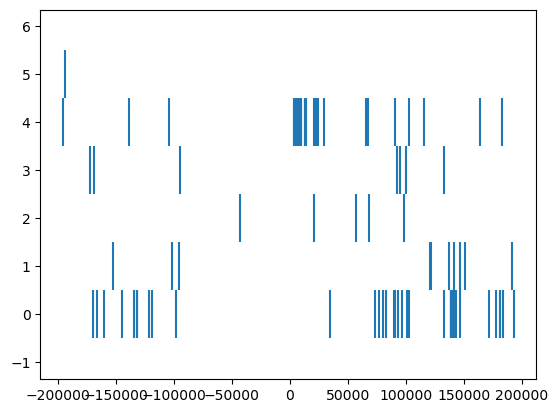

In [89]:
plt.eventplot(example_df["relative_time_to_tone"])

# Calculating average firing rate

In [90]:
merged_spike_trial_df

,spike_clusters,spike_times,cluster_id,1_5_ms_isi,1ms_isi,2ms_isi,amp,ch,channel_group,depth,...,competition_closeness,Unnamed: 13,resampled_index,all_subjects,current_subject,trial_outcome,trial_number,trial_chunked_ephys_timestamp,timestamp_bin,relative_time_to_tone
0,103,11399273,103,12,2,32,14.402934,6,0.0,120.0,...,Subj 2 blocking Subj 1,NaN,579962,"[1.4, 1.1]",1.4,win,1,"[11399246, 11401246, 11403246, 11405246, 11407...",-100,-199973
1,83,11399416,83,9,3,26,13.022879,2,0.0,40.0,...,Subj 2 blocking Subj 1,NaN,579962,"[1.4, 1.1]",1.4,win,1,"[11399246, 11401246, 11403246, 11405246, 11407...",-100,-199830
2,65,11399798,65,2,1,3,8.466800,2,0.0,40.0,...,Subj 2 blocking Subj 1,NaN,579962,"[1.4, 1.1]",1.4,win,1,"[11399246, 11401246, 11403246, 11405246, 11407...",-100,-199448
3,103,11399996,103,12,2,32,14.402934,6,0.0,120.0,...,Subj 2 blocking Subj 1,NaN,579962,"[1.4, 1.1]",1.4,win,1,"[11399246, 11401246, 11403246, 11405246, 11407...",-100,-199250
4,103,11400706,103,12,2,32,14.402934,6,0.0,120.0,...,Subj 2 blocking Subj 1,NaN,579962,"[1.4, 1.1]",1.4,win,1,"[11399246, 11401246, 11403246, 11405246, 11407...",-100,-198540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295736,262,38675317,262,1,1,1,11.366614,6,0.0,120.0,...,,NaN,1923872,"[1.2, 1.4]",1.4,rewarded,16,"[38277451, 38279451, 38281451, 38283451, 38285...",98,197866
295737,44,38675962,44,3,1,29,9.739503,17,0.0,340.0,...,,NaN,1923872,"[1.2, 1.4]",1.4,rewarded,16,"[38277451, 38279451, 38281451, 38283451, 38285...",99,198511
295738,262,38676329,262,1,1,1,11.366614,6,0.0,120.0,...,,NaN,1923872,"[1.2, 1.4]",1.4,rewarded,16,"[38277451, 38279451, 38281451, 38283451, 38285...",99,198878
295739,134,38677144,134,5,4,17,8.562255,2,0.0,40.0,...,,NaN,1923872,"[1.2, 1.4]",1.4,rewarded,16,"[38277451, 38279451, 38281451, 38283451, 38285...",99,199693


In [91]:
grouped_df = merged_spike_trial_df.groupby(["recording_file", "timestamp_bin", "spike_clusters", "trial_outcome", "fr"]).count()[["spike_times"]].reset_index()
# Rename the aggregated column

In [92]:
grouped_df["total_number_of_trials"] = grouped_df.apply(lambda row: total_number_of_trials_dict[(row["recording_file"], row["trial_outcome"])], axis=1)

In [93]:
grouped_df["spike_times"] = grouped_df["spike_times"] / grouped_df["total_number_of_trials"] / grouped_df["fr"]

In [94]:
grouped_df

,recording_file,timestamp_bin,spike_clusters,trial_outcome,fr,spike_times,total_number_of_trials
0,20221202_134600_omission_and_competition_subje...,-100,13,omission,5.425209,0.061442,3
1,20221202_134600_omission_and_competition_subje...,-100,13,rewarded,5.425209,0.201081,11
2,20221202_134600_omission_and_competition_subje...,-100,17,rewarded,1.787106,0.050869,11
3,20221202_134600_omission_and_competition_subje...,-100,21,omission,12.246128,0.081658,3
4,20221202_134600_omission_and_competition_subje...,-100,21,rewarded,12.246128,0.126199,11
...,...,...,...,...,...,...,...
58370,20230621_111240_standard_comp_to_omission_D5_s...,99,86,rewarded,0.805067,1.009233,16
58371,20230621_111240_standard_comp_to_omission_D5_s...,99,87,lose,0.622853,1.123861,10
58372,20230621_111240_standard_comp_to_omission_D5_s...,99,87,rewarded,0.622853,0.602069,16
58373,20230621_111240_standard_comp_to_omission_D5_s...,99,89,omission,3.099078,0.080669,4


In [95]:
grouped_df["spike_times"].mean()

0.17451846930669088

In [96]:
pivot_df = grouped_df.pivot_table(index=['recording_file', 'spike_clusters', 'trial_outcome'], columns='timestamp_bin', values='spike_times', fill_value=0).reset_index().set_index("spike_clusters")

In [97]:
pivot_df

timestamp_bin,recording_file,trial_outcome,-100,-99,-98,-97,-96,-95,-94,-93,...,90,91,92,93,94,95,96,97,98,99
spike_clusters,,,,,,,,,,,,,,,,,,,,,
13,20221202_134600_omission_and_competition_subje...,omission,0.061442,0.061442,0.122883,0.000000,0.061442,0.000000,0.122883,0.061442,...,0.061442,0.061442,0.061442,0.122883,0.122883,0.000000,0.061442,0.184325,0.000000,0.061442
13,20221202_134600_omission_and_competition_subje...,rewarded,0.201081,0.251352,0.117298,0.100541,0.117298,0.083784,0.083784,0.201081,...,0.117298,0.150811,0.117298,0.201081,0.117298,0.167568,0.134054,0.033514,0.150811,0.150811
17,20221202_134600_omission_and_competition_subje...,omission,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.373042,0.186521,0.186521,0.373042,0.373042,0.186521,0.186521,0.373042,0.559564,0.932606
17,20221202_134600_omission_and_competition_subje...,rewarded,0.050869,0.152608,0.254347,0.203478,0.305217,0.254347,0.406955,0.203478,...,0.305217,0.050869,0.101739,0.305217,0.203478,0.152608,0.203478,0.152608,0.050869,0.050869
21,20221202_134600_omission_and_competition_subje...,omission,0.081658,0.027219,0.136097,0.108878,0.081658,0.217756,0.136097,0.244975,...,0.081658,0.136097,0.081658,0.081658,0.081658,0.108878,0.163317,0.108878,0.136097,0.054439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,20230621_111240_standard_comp_to_omission_D5_s...,omission,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.401379,0.000000,0.000000,0.401379,0.000000
87,20230621_111240_standard_comp_to_omission_D5_s...,rewarded,0.100345,0.100345,0.100345,0.100345,0.100345,0.200690,0.100345,0.100345,...,0.802758,0.602069,0.903103,0.401379,0.702413,0.602069,1.003448,0.602069,0.501724,0.602069
89,20230621_111240_standard_comp_to_omission_D5_s...,lose,0.096803,0.032268,0.129071,0.258141,0.032268,0.032268,0.064535,0.064535,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.032268,0.000000,0.000000,0.032268,0.000000


In [98]:
from matplotlib.colors import LogNorm, Normalize


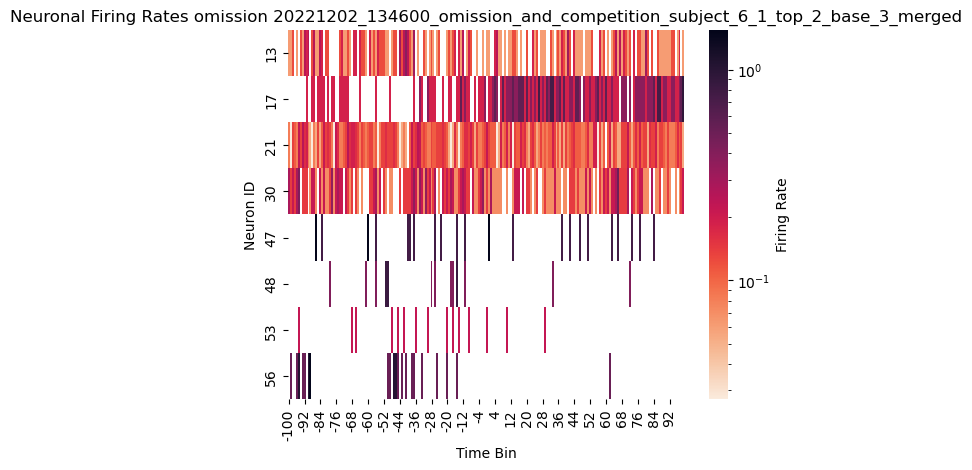

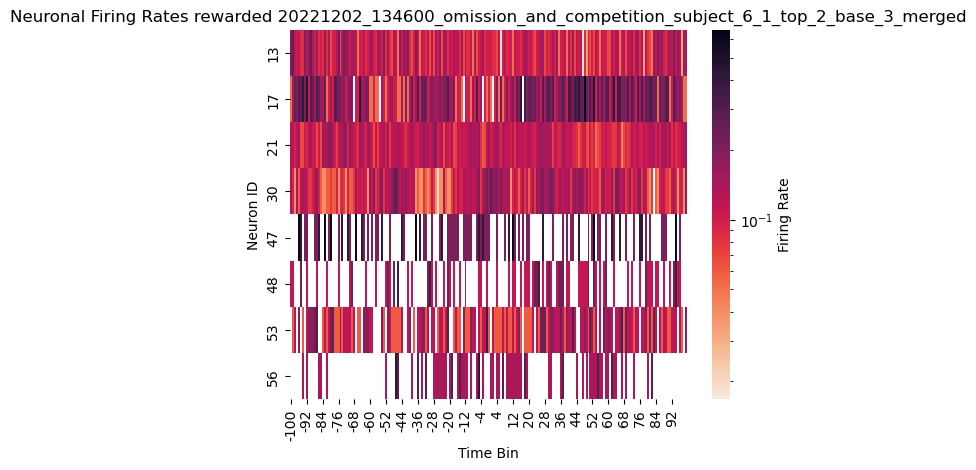

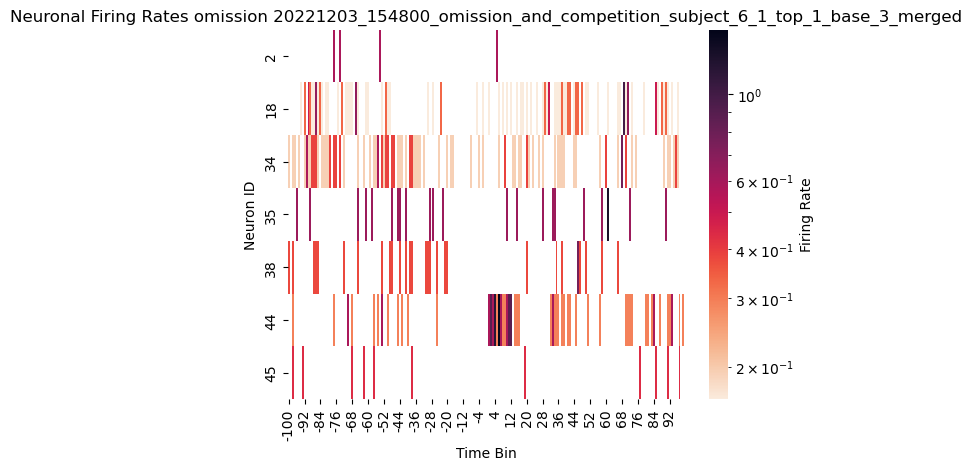

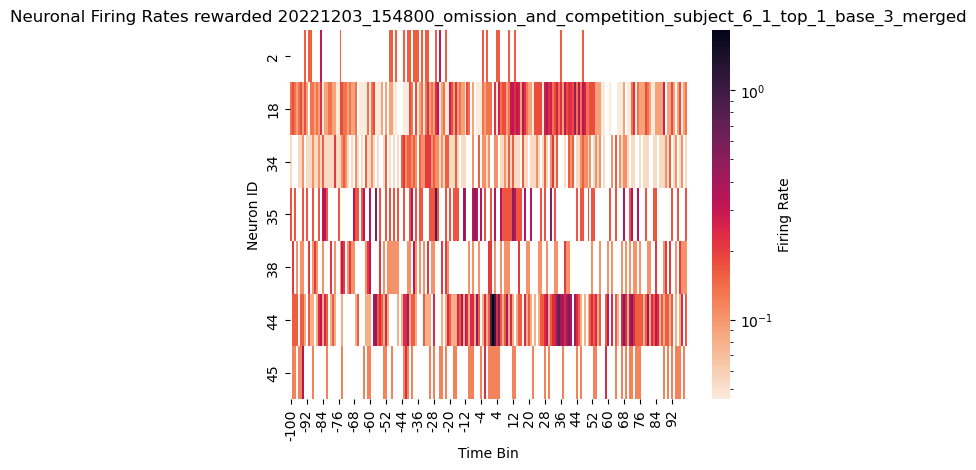

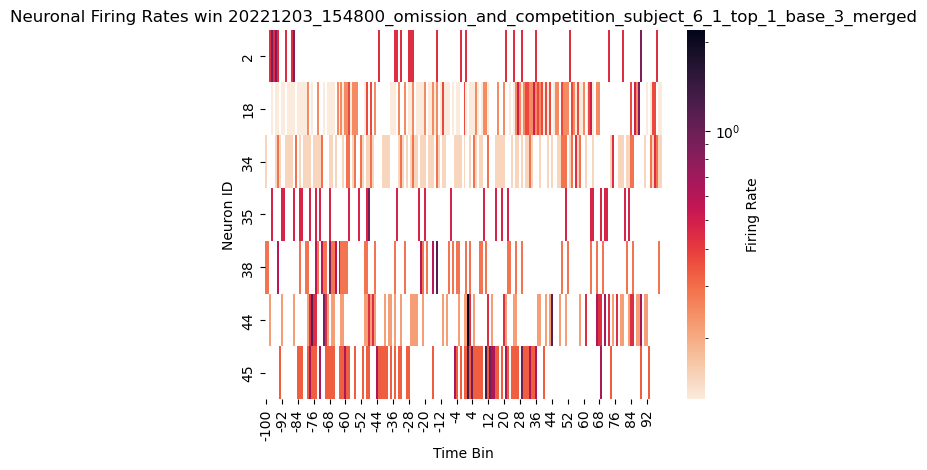

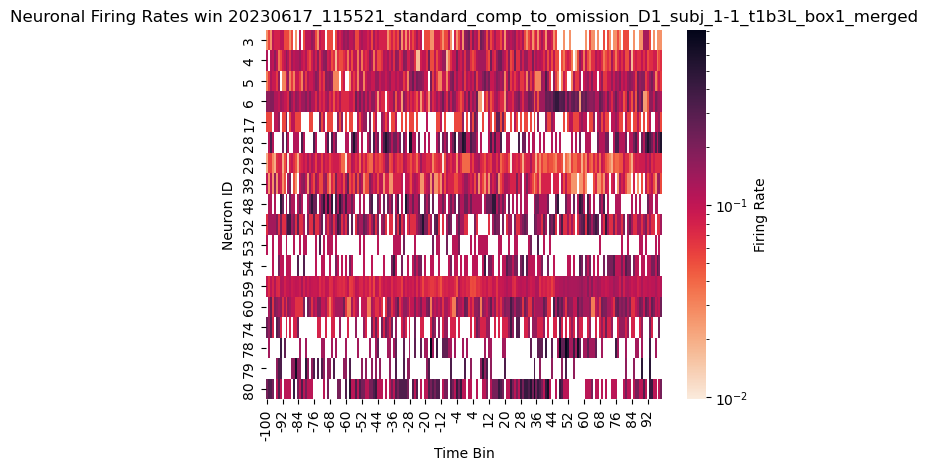

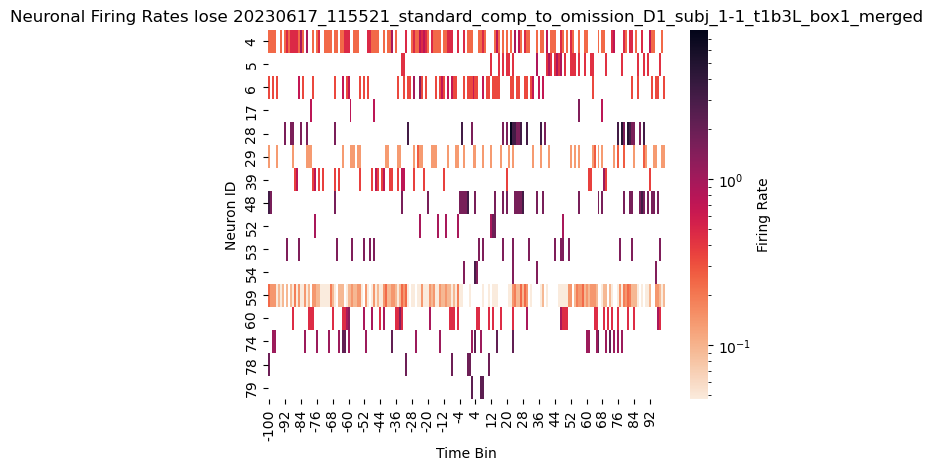

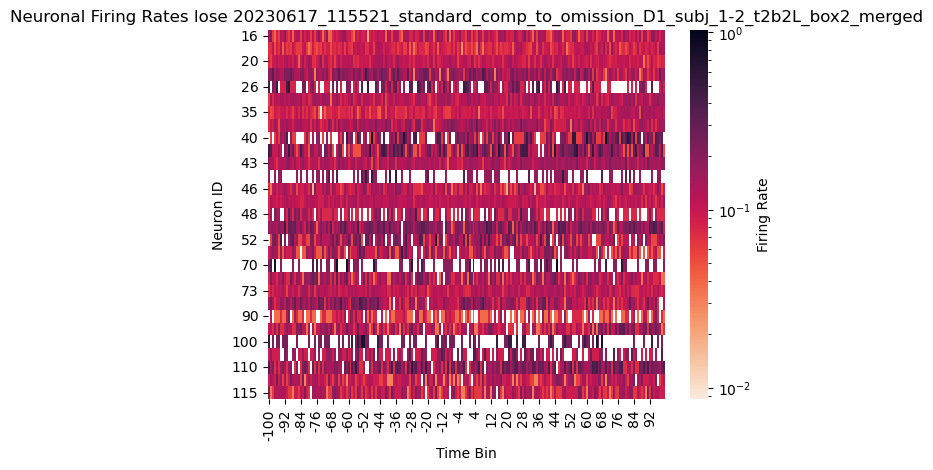

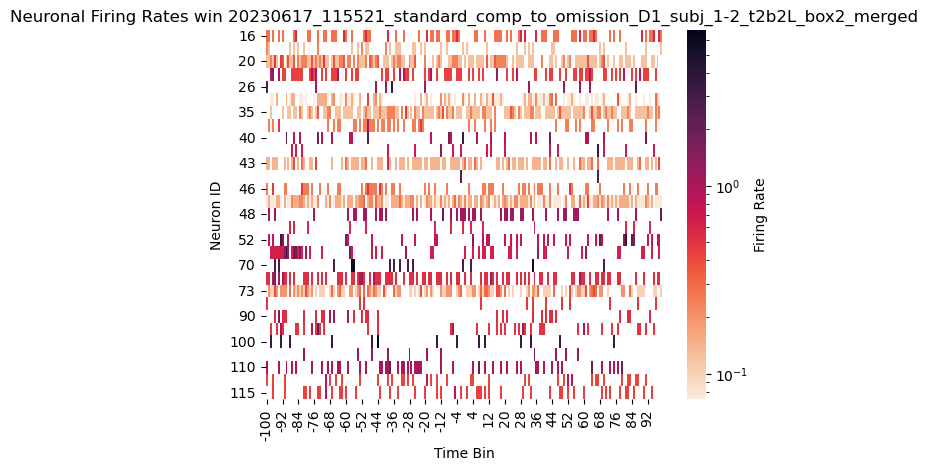

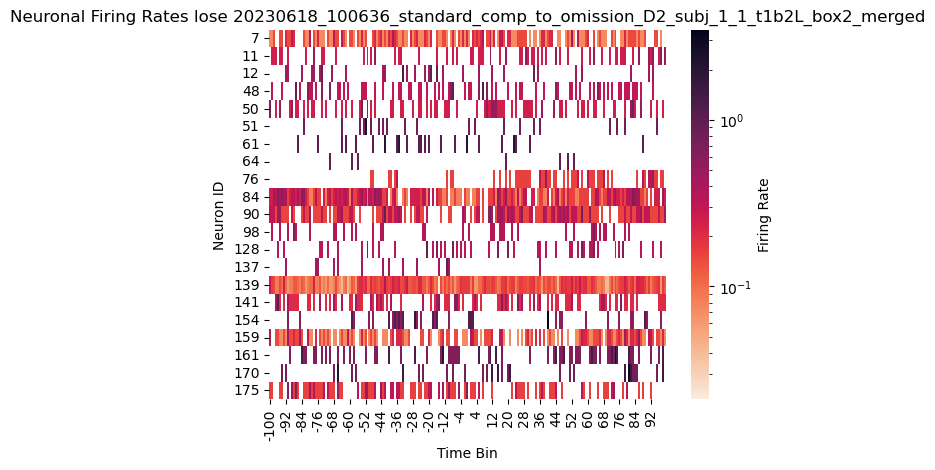

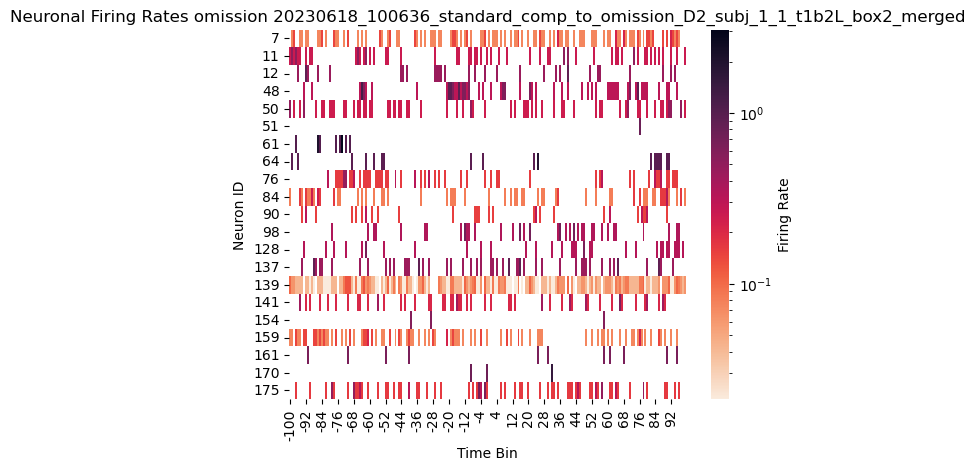

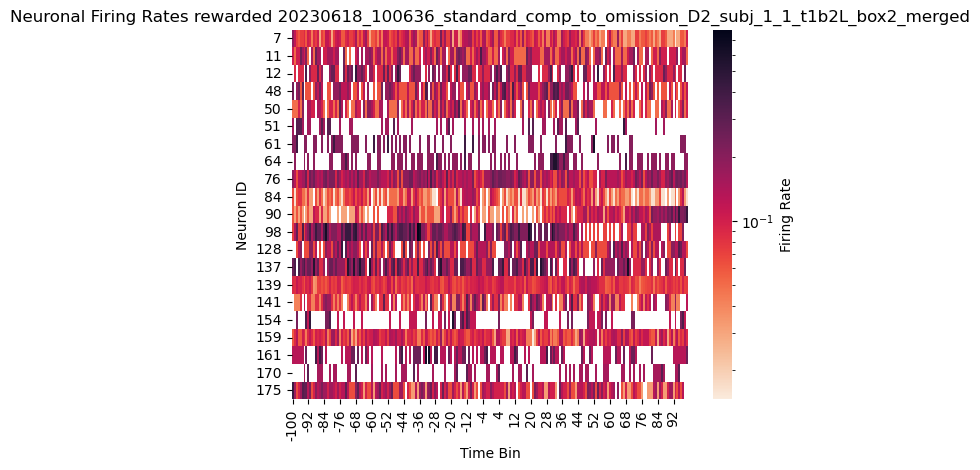

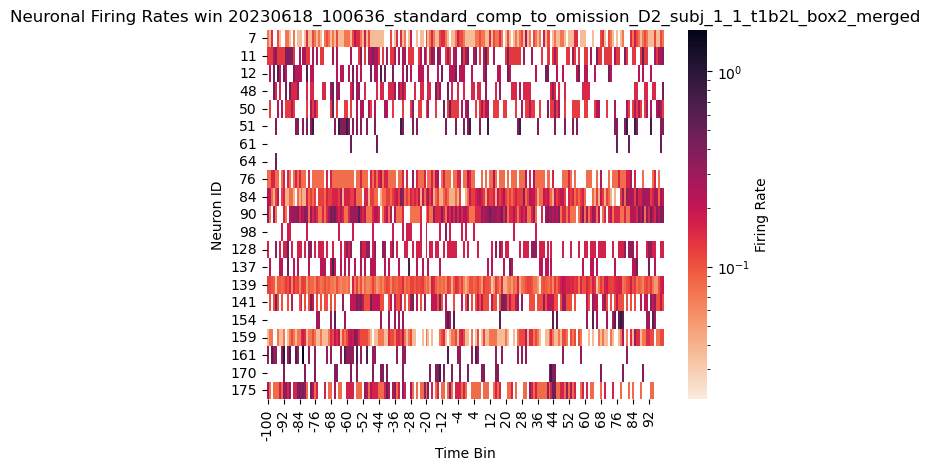

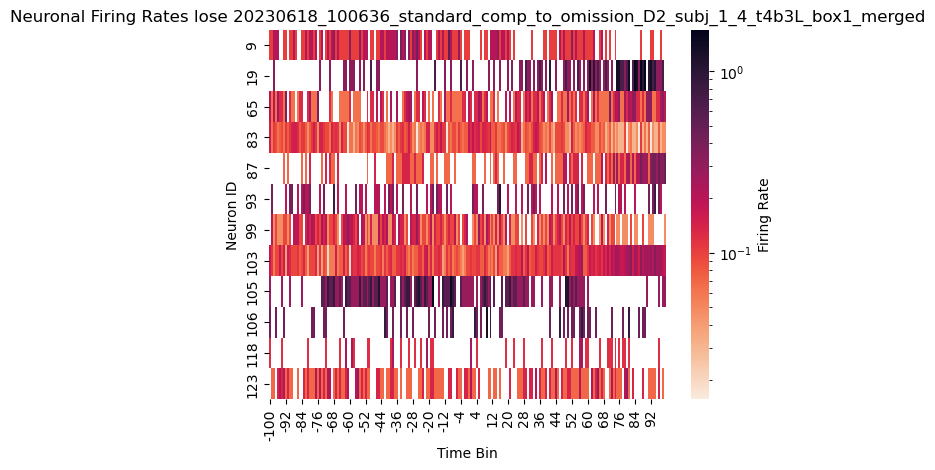

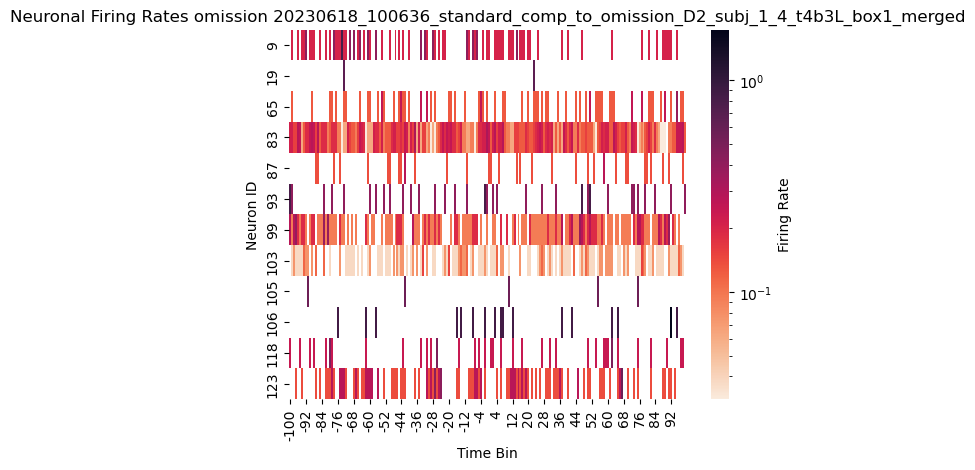

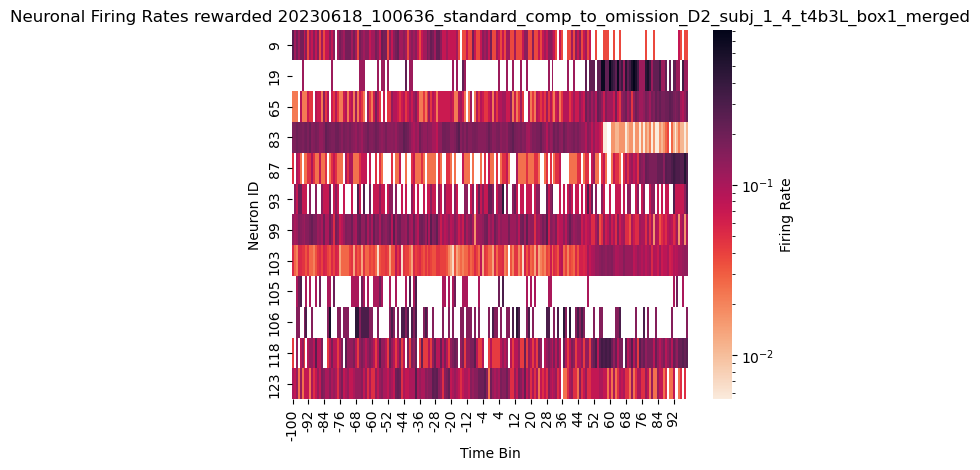

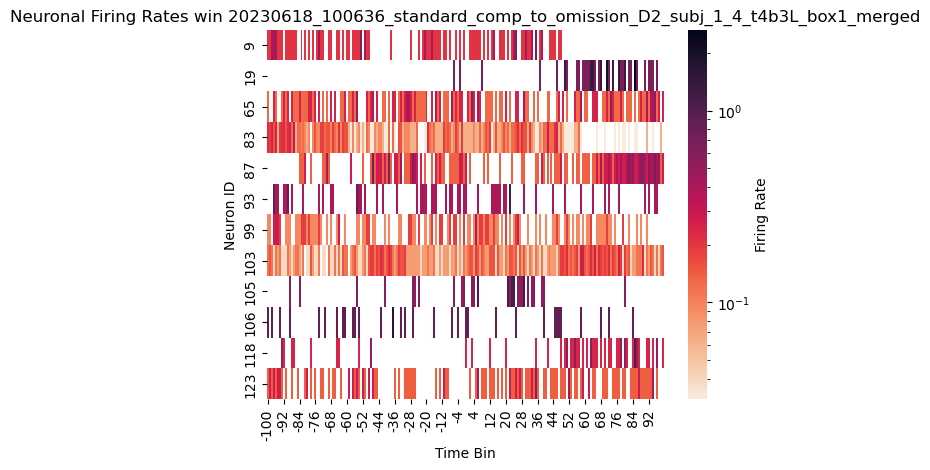

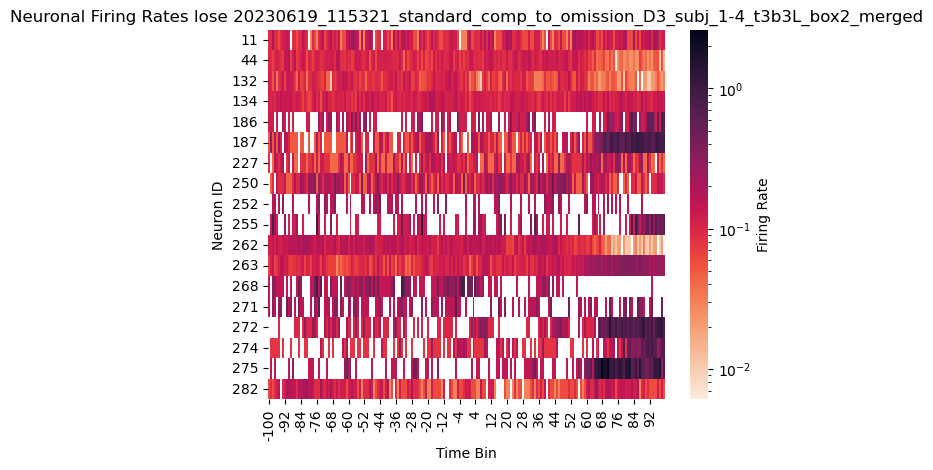

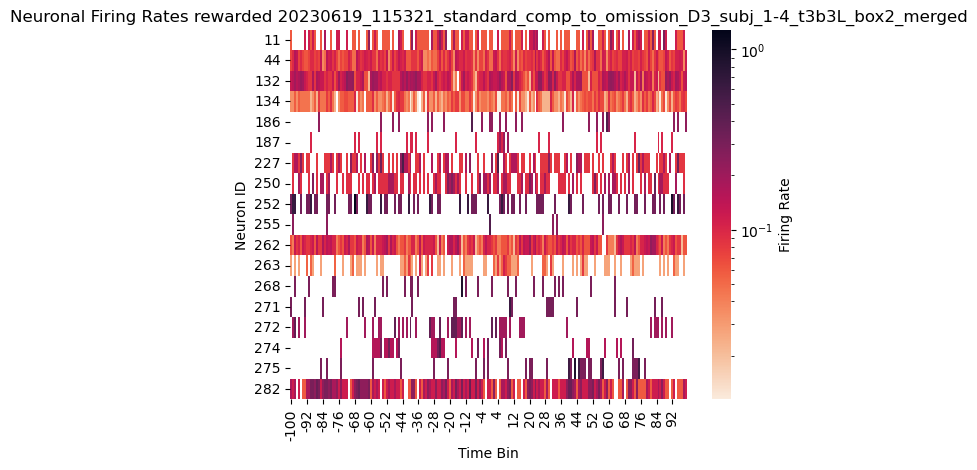

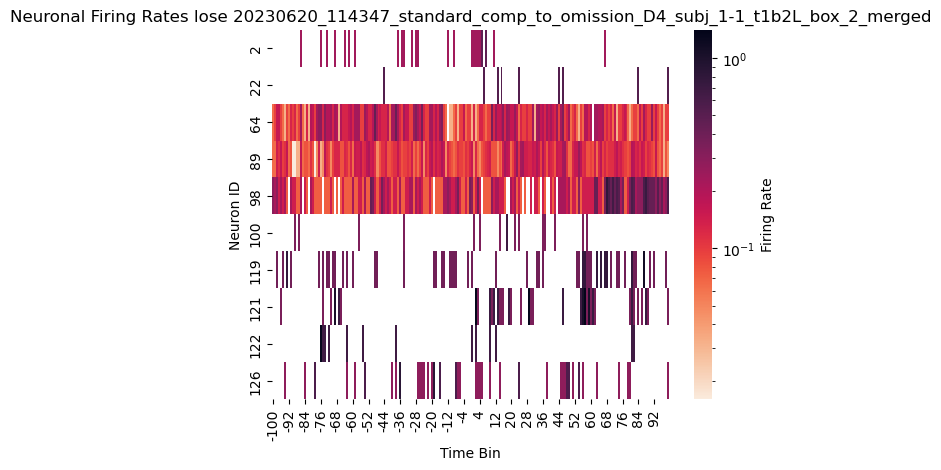

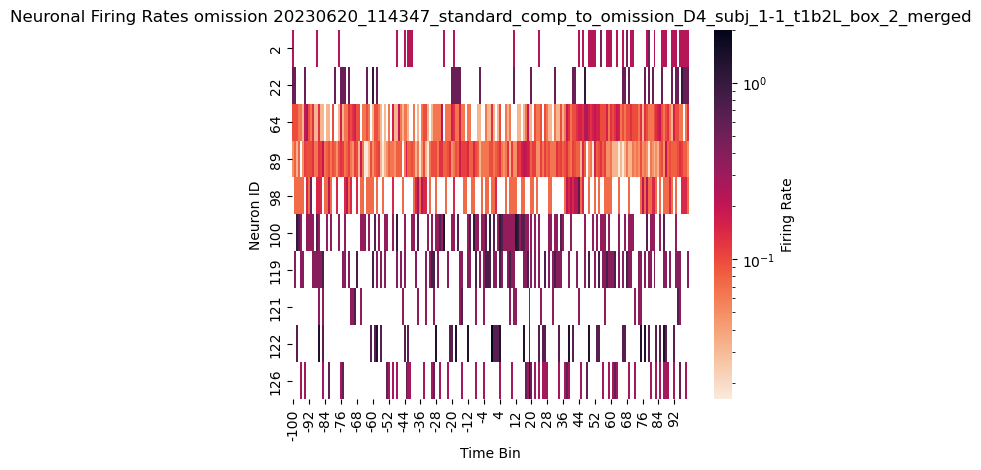

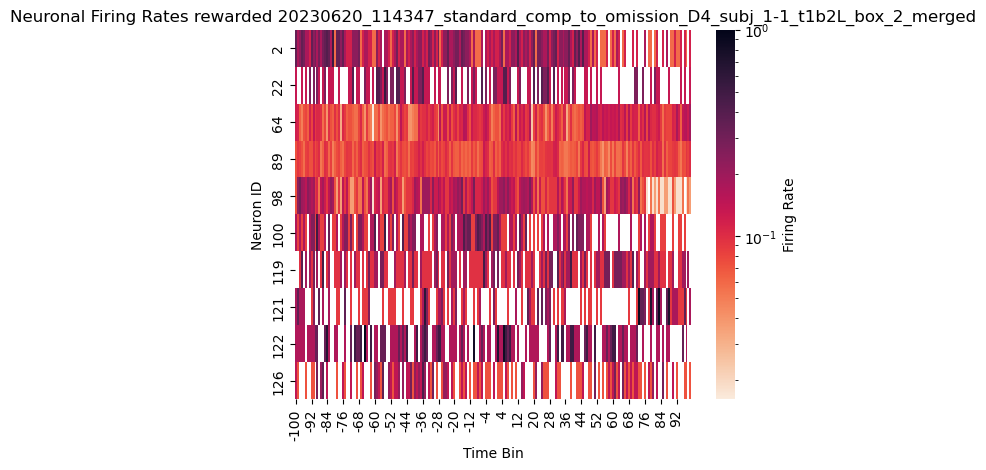

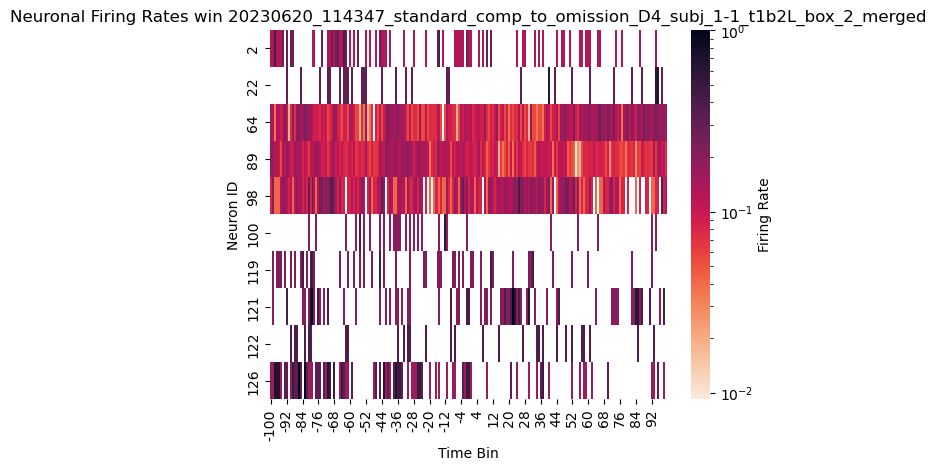

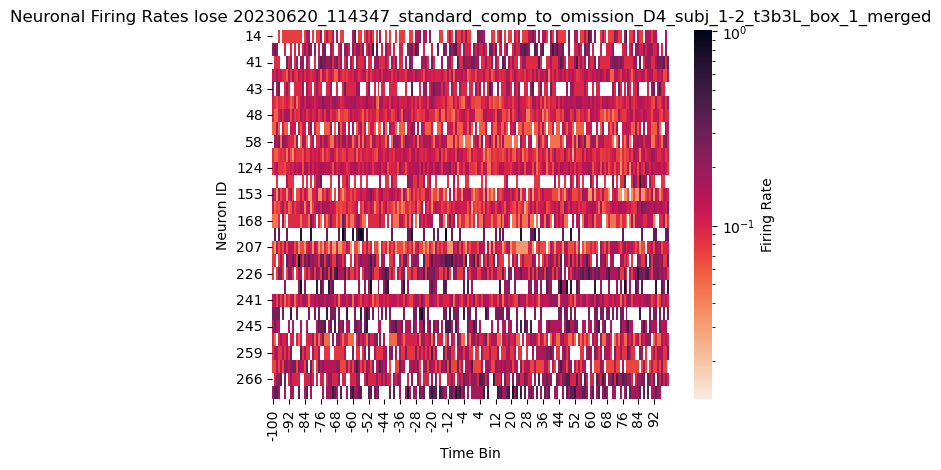

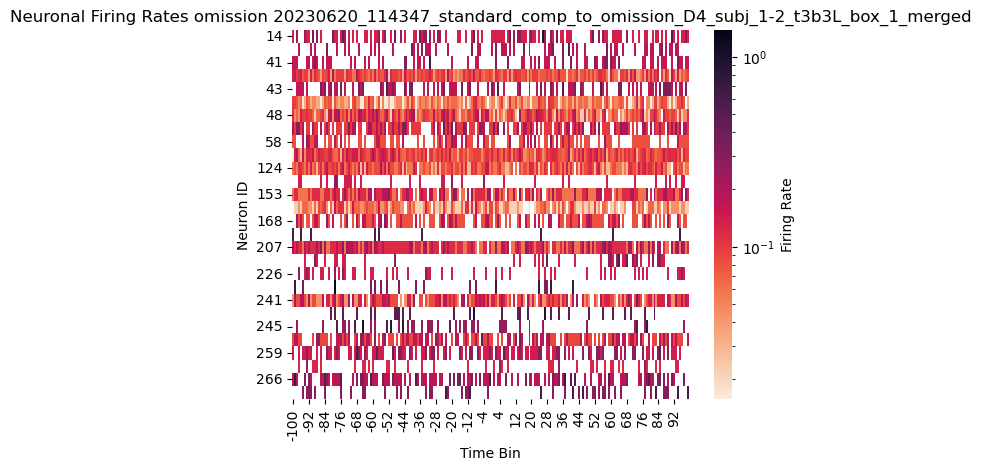

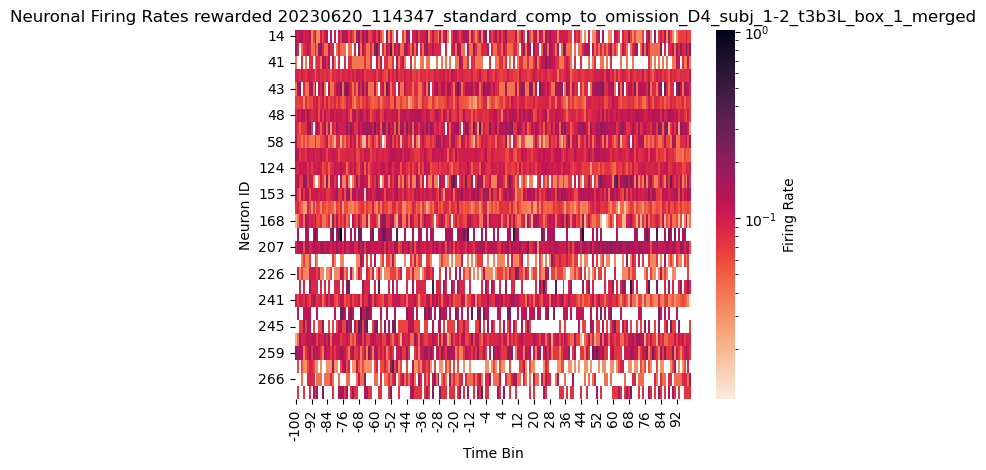

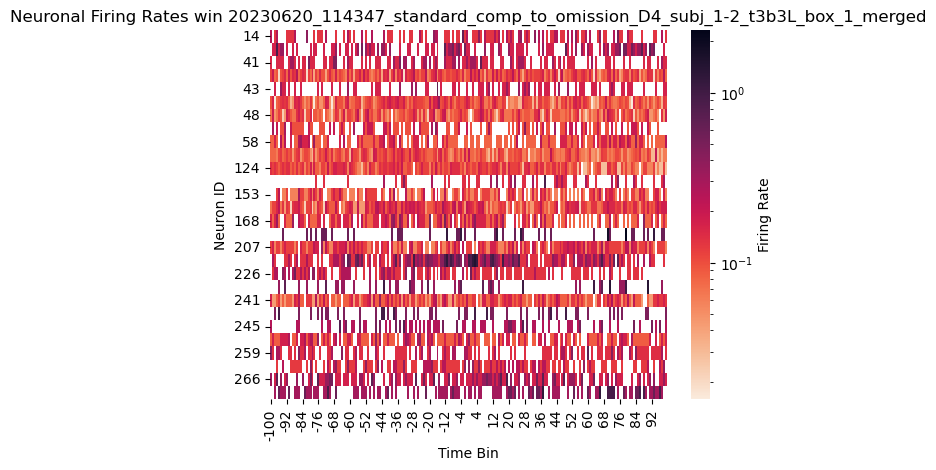

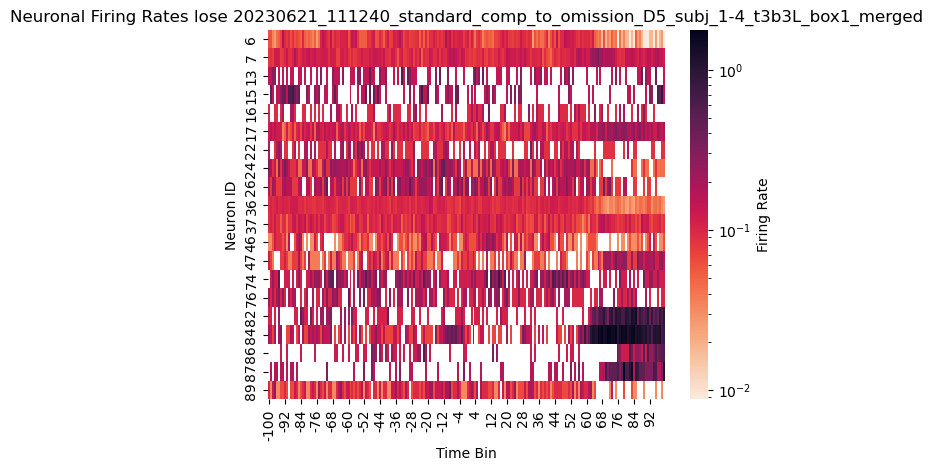

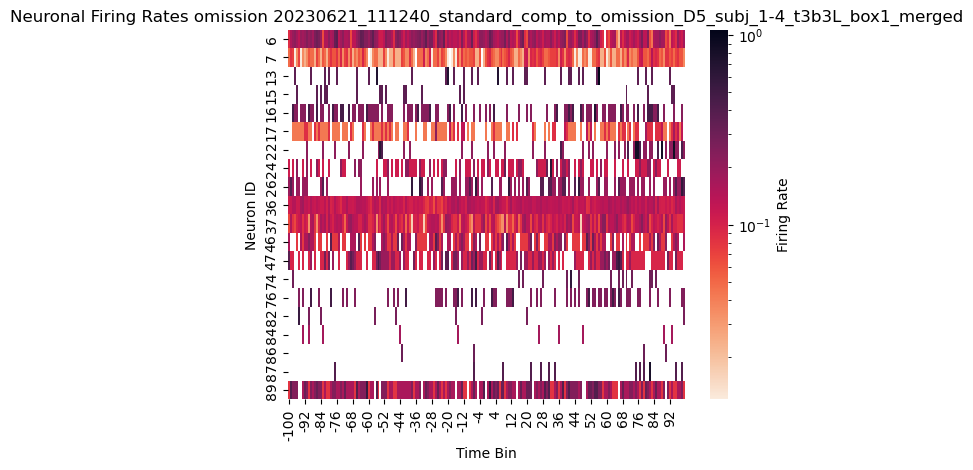

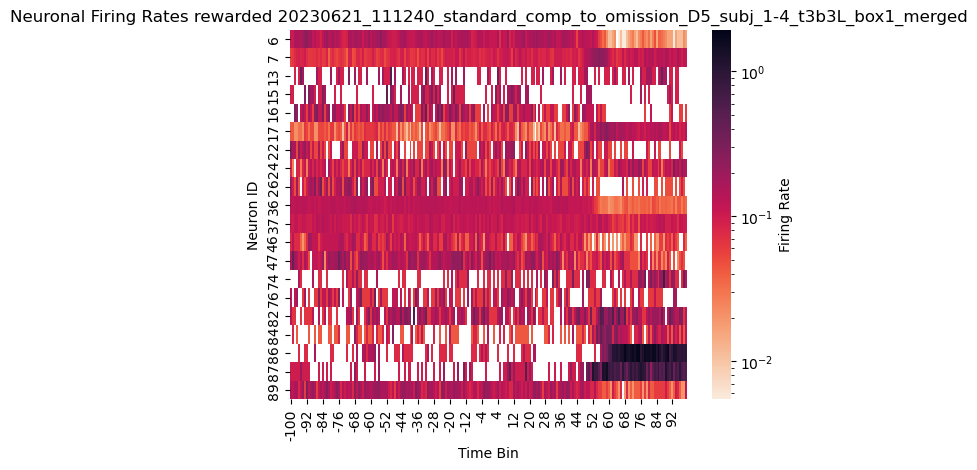

In [99]:
for recording_file in pivot_df["recording_file"].unique():
    recording_df = pivot_df[pivot_df["recording_file"] == recording_file].copy()
    for outcome in recording_df["trial_outcome"].unique():
        outcome_df = recording_df[recording_df["trial_outcome"] == outcome].drop(columns=["recording_file", "trial_outcome"])
        
        sns.heatmap(outcome_df, annot=False, cmap='rocket_r', cbar_kws={'label': 'Firing Rate'}, norm=LogNorm())
        
        # Customizing the plot
        plt.title('Neuronal Firing Rates {} {}'.format(outcome, recording_file))
        plt.xlabel('Time Bin')
        plt.ylabel('Neuron ID')
        
        # Show the plot
        plt.show()


# Plotting PCA

In [100]:
merged_spike_trial_df["unique_neuron"] = "id" + merged_spike_trial_df["spike_clusters"].astype(str) + "_" + merged_spike_trial_df["recording_file"]

merged_spike_trial_df["time_bin_and_outcome"] = merged_spike_trial_df["timestamp_bin"].astype(str) + "_" + merged_spike_trial_df["trial_outcome"]

In [101]:
grouped_df = merged_spike_trial_df.groupby(["time_bin_and_outcome", "unique_neuron", "recording_file", "trial_outcome"]).count()[["spike_times"]].reset_index()
# Rename the aggregated column

In [102]:
grouped_df

,time_bin_and_outcome,unique_neuron,recording_file,trial_outcome,spike_times
0,-100_lose,id100_20230617_115521_standard_comp_to_omissio...,20230617_115521_standard_comp_to_omission_D1_s...,lose,2
1,-100_lose,id103_20230618_100636_standard_comp_to_omissio...,20230618_100636_standard_comp_to_omission_D2_s...,lose,9
2,-100_lose,id105_20230617_115521_standard_comp_to_omissio...,20230617_115521_standard_comp_to_omission_D1_s...,lose,1
3,-100_lose,id105_20230618_100636_standard_comp_to_omissio...,20230618_100636_standard_comp_to_omission_D2_s...,lose,1
4,-100_lose,id106_20230618_100636_standard_comp_to_omissio...,20230618_100636_standard_comp_to_omission_D2_s...,lose,1
...,...,...,...,...,...
58370,9_win,id89_20230620_114347_standard_comp_to_omission...,20230620_114347_standard_comp_to_omission_D4_s...,win,5
58371,9_win,id90_20230618_100636_standard_comp_to_omission...,20230618_100636_standard_comp_to_omission_D2_s...,win,3
58372,9_win,id98_20230620_114347_standard_comp_to_omission...,20230620_114347_standard_comp_to_omission_D4_s...,win,1
58373,9_win,id99_20230618_100636_standard_comp_to_omission...,20230618_100636_standard_comp_to_omission_D2_s...,win,1


In [103]:
grouped_df["total_number_of_trials"] = grouped_df.apply(lambda row: total_number_of_trials_dict[(row["recording_file"], row["trial_outcome"])], axis=1)

In [104]:
grouped_df["spike_times"] = grouped_df["spike_times"] / grouped_df["total_number_of_trials"]

In [105]:
grouped_df["spike_times"].mean()

0.625234845131356

In [106]:
pivot_df = grouped_df.pivot_table(index=['unique_neuron'], columns='time_bin_and_outcome', values='spike_times', fill_value=0).reset_index().set_index("unique_neuron")

In [107]:
pivot_df.head()

time_bin_and_outcome,-100_lose,-100_omission,-100_rewarded,-100_win,-10_lose,-10_omission,-10_rewarded,-10_win,-11_lose,-11_omission,...,98_rewarded,98_win,99_lose,99_omission,99_rewarded,99_win,9_lose,9_omission,9_rewarded,9_win
unique_neuron,,,,,,,,,,,,,,,,,,,,,
id100_20230617_115521_standard_comp_to_omission_D1_subj_1-2_t2b2L_box2_merged,0.142857,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.071429,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000,0.0
id100_20230620_114347_standard_comp_to_omission_D4_subj_1-1_t1b2L_box_2_merged,0.000000,0.0,0.125000,0.0,0.000000,0.0,0.062500,0.000000,0.000000,0.5,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.25,0.125,0.0
id103_20230618_100636_standard_comp_to_omission_D2_subj_1_4_t4b3L_box1_merged,1.500000,0.0,0.470588,1.0,0.666667,0.0,0.235294,0.666667,1.000000,1.0,...,1.176471,1.0,1.500000,0.0,1.176471,1.333333,0.833333,0.00,0.000,1.0
id105_20230617_115521_standard_comp_to_omission_D1_subj_1-2_t2b2L_box2_merged,0.071429,0.0,0.000000,0.0,0.142857,0.0,0.000000,0.000000,0.071429,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.285714,0.00,0.000,0.0
id105_20230618_100636_standard_comp_to_omission_D2_subj_1_4_t4b3L_box1_merged,0.166667,0.0,0.000000,0.0,0.333333,0.0,0.000000,0.000000,0.333333,0.0,...,0.000000,0.0,0.166667,0.0,0.000000,0.000000,0.333333,0.00,0.000,0.0


In [108]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [109]:
pivot_df.to_numpy()

array([[0.14285714, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.125     , ..., 0.25      , 0.125     ,
        0.        ],
       [1.5       , 0.        , 0.47058824, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.        , 0.25      , ..., 0.25      , 0.4375    ,
        0.14285714],
       [0.        , 1.        , 0.47058824, ..., 0.66666667, 0.64705882,
        0.33333333],
       [0.16666667, 0.        , 0.41176471, ..., 0.        , 0.17647059,
        0.33333333]])

In [110]:
scaled_firing_rates = sc.fit_transform(pivot_df.to_numpy())


In [111]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
 


In [112]:
pca = PCA(n_components = 2)



In [113]:
pca_firing_rates = pca.fit_transform(scaled_firing_rates)


In [114]:
principal_df = pd.DataFrame(data = pca_firing_rates
             , columns = ['principal component 1', 'principal component 2'])

In [115]:
principal_df.head()

,principal component 1,principal component 2
0,-11.041674,3.564091
1,-8.219141,6.750606
2,16.798447,-21.356340
3,-10.606348,3.687117
4,-9.240245,3.406114


In [116]:
pc1_product = pivot_df.reset_index(drop=True).multiply(principal_df["principal component 1"], axis="index")

In [117]:
pc2_product = pivot_df.reset_index(drop=True).multiply(principal_df["principal component 2"], axis="index")

In [118]:
pc_product = pd.concat([pc1_product.mean(), pc2_product.mean()], axis=1).reset_index()

In [119]:
pc_product

,time_bin_and_outcome,0,1
0,-100_lose,11.628410,-3.009242
1,-100_omission,10.187785,1.337087
2,-100_rewarded,12.992737,1.789811
3,-100_win,3.786619,-3.501946
4,-10_lose,10.169209,-1.829922
...,...,...,...
795,99_win,3.455876,-3.708995
796,9_lose,11.309803,-0.924059
797,9_omission,11.461217,1.909803
798,9_rewarded,13.540893,1.784005


In [120]:
pc_product["bin_time"] = pc_product["time_bin_and_outcome"].apply(lambda x: int(x.split("_")[0]))
pc_product["trial_type"] = pc_product["time_bin_and_outcome"].apply(lambda x: (x.split("_")[1]))

In [121]:
outcome_to_color = {"lose": "orange", "rewarded": "green", "win": "blue", "omission": "red"}

In [122]:
pc_product["color"] = pc_product["trial_type"].map(outcome_to_color)

In [123]:
pc_product

,time_bin_and_outcome,0,1,bin_time,trial_type,color
0,-100_lose,11.628410,-3.009242,-100,lose,orange
1,-100_omission,10.187785,1.337087,-100,omission,red
2,-100_rewarded,12.992737,1.789811,-100,rewarded,green
3,-100_win,3.786619,-3.501946,-100,win,blue
4,-10_lose,10.169209,-1.829922,-10,lose,orange
...,...,...,...,...,...,...
795,99_win,3.455876,-3.708995,99,win,blue
796,9_lose,11.309803,-0.924059,9,lose,orange
797,9_omission,11.461217,1.909803,9,omission,red
798,9_rewarded,13.540893,1.784005,9,rewarded,green


In [124]:
pc_product["bin_time"] = pc_product["bin_time"].astype(int)

all_outcome_df = []
for outcome in pc_product["trial_type"].unique():
    outcome_df = pc_product[pc_product["trial_type"] == outcome]
    outcome_df = outcome_df.sort_values(["bin_time"])
    outcome_df['0'] = outcome_df[0].rolling(10).mean()    
    outcome_df['1'] = outcome_df[1].rolling(10).mean()
    all_outcome_df.append(outcome_df)

In [125]:
pc_product = pd.concat(all_outcome_df).dropna()

In [126]:
pc_product

,time_bin_and_outcome,0,1,bin_time,trial_type,color,0,1
360,-91_lose,10.883993,-1.202656,-91,lose,orange,11.447102,-1.674205
356,-90_lose,10.311722,-0.793754,-90,lose,orange,11.315433,-1.452656
348,-89_lose,11.892236,-1.306037,-89,lose,orange,11.390635,-1.417977
344,-88_lose,12.196126,-0.507415,-88,lose,orange,11.544658,-1.251473
340,-87_lose,13.305122,-1.900571,-87,lose,orange,11.756716,-1.267522
...,...,...,...,...,...,...,...,...
779,95_win,2.461727,-3.085625,95,win,blue,2.796054,-3.454087
783,96_win,2.932898,-4.166835,96,win,blue,2.807771,-3.534761
787,97_win,2.644491,-3.358496,97,win,blue,2.811347,-3.559058
791,98_win,4.137074,-4.547845,98,win,blue,2.955210,-3.673984


In [127]:
sigma = 3
divider = 5

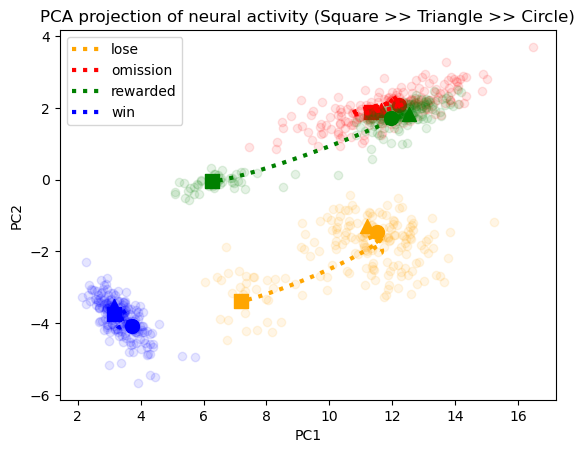

In [128]:
# Create scatter plot
# plt.plot(pc_product[0], pc_product[1], color=pc_product["color"])

for outcome in pc_product["trial_type"].unique():
    
    outcome_df = pc_product[pc_product["trial_type"] == outcome].sort_values("bin_time")
    plt.scatter(outcome_df[0], outcome_df[1], color=outcome_to_color[outcome], alpha=0.1)
    
    smoothed_x = gaussian_filter1d(outcome_df[0][::divider], sigma=sigma)
    
    # smoothed_x = outcome_df[0].rolling(window=10).mean()[::10]
    smoothed_y = gaussian_filter1d(outcome_df[1][::divider], sigma=sigma)
    # smoothed_y = outcome_df[1].rolling(window=10).mean()[::10]

    plt.scatter(smoothed_x[0], smoothed_y[0], color=outcome_to_color[outcome], marker = 'o', s=100)
    plt.scatter(smoothed_x[len(smoothed_x)//2], smoothed_y[len(smoothed_y)//2], color=outcome_to_color[outcome], marker = '^', s=100)
    plt.scatter(smoothed_x[len(smoothed_x)-1], smoothed_y[len(smoothed_y)-1], color=outcome_to_color[outcome], marker = 's', s=100)

    
    # Create smoothed line plot
    plt.plot(smoothed_x, smoothed_y, color=outcome_to_color[outcome], ls=':', label=outcome, linewidth=3)

plt.legend()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA projection of neural activity (Square >> Triangle >> Circle)")
plt.savefig("./pca_rce.png")
# Show plot
plt.show()

In [129]:
raise ValueError()

ValueError: 